## SEGUNDO PARCIAL DE INTELIGENCIA ARTIFICIAL

### Análisis de productos en e-commerce
Formas parte del equipo de analítica de uno de los e-commerce más importantes del sector. El departamento del producto marketplace acaba de recopilar en un dataset más de 10000 reviews de distintos productos transaccionados en la plataforma.

### ¿Qué debes hacer?


1. El departamento de marketplace te plantea que aquellas reviews con ratings de 1 o 2 son negativas mientras que las reseñas con ratings de 3, 4 o 5 son positivas. En base a esta regla te piden que uses tus conocimientos en NLP y embeddings para analizar el contenido en texto de las reseñas y crear una red neuronal que pueda categorizar a estas reseñas correctamente entre positivas y negativas. Evalúa el rendimiento de la red con la métrica que consideres adecuada.

2. Un segundo objetivo es poder agrupar productos similares en base a sus características (sin considerar los campos reseña y descripción del producto). En consecuencia se le solicita armar una tabla agrupada por productos únicos con al menos 6 features de cada producto y que con esa tabla:

  a. Realice e interprete una visualización 2D de los productos utilizando los modelos de reducción de dimensionalidad de PCA, TSNE y UMAP.

  b. Separe los productos en el número de clusters que considere indicado utilizando al menos dos de los siguientes métodos: K-Means, Jerárquico y DBSCAN y eligiendo el método que mejor separación haga en base a sus criterios debidamente justificados.

  c. Describa brevemente las características de cada cluster.

3. Finalmente el departamento le consulta si es posible buscar los 3 elementos más similares al producto con más reviews. Utilice sus conocimientos en NLP y métricas de similitud para dar su respuesta.

4. Muestre mediante gráficos y explicaciones acordes, las conclusiones a las que ha arribado en cada parte del proceso. Documente y comente cada uno de los pasos del análisis y sus decisiones para demostrar su entendimiento sobre el tema.



Dataset: https://drive.google.com/file/d/1yjnkmiHM3NbPp8B6drd3niTzN3rqnjLK/view?usp=sharing

Variables:

- product_id: Código único que identifica a cada producto.

- user_id: Código único que identifica a cada cliente que escribió una reseña.

- product_name: Nombre comercial completo del producto.

- category: Categoría general a la que pertenece el producto.

- brand: Marca del producto.

- product_price: Precio de venta del producto en el momento de la compra.

- units_bought: Indica cuántas unidades de ese producto compró el cliente en esa transacción.

- rating: Calificación en estrellas (de 1 a 5) que el usuario le dio al producto.

- review_text: Comentario o la opinión escrita que dejó el cliente sobre el producto.

- product_description: Texto detallado que describe las características del producto.

- date_of_review: Fecha exacta en la que el cliente publicó su reseña.

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTACIÓN DE LIBRERÍAS</p>

In [2]:
# 📦 Manejo de datos y utilidades
import numpy as np
import pandas as pd
import sys
import time
import datetime
import warnings
import string
from collections import Counter

In [3]:
# 📈 Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
# 🧹 Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
# 🧠 NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
#import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split

In [6]:
# 🔍 Reducción de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, trustworthiness
# import umap.umap_ as umap  

In [7]:
# 🤖 Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from yellowbrick.cluster import KElbowVisualizer

In [8]:
# 📊 Métricas de clustering
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [9]:
# ⚠️ Ignorar warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# 🔒 Semilla para reproducibilidad
np.random.seed(42)

# 🔁 NLTK - Descargar recursos necesarios si no están
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lolonastri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lolonastri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lolonastri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CARGA DE DATOS</p>

In [10]:
df_reviews = pd.read_csv('/Users/lolonastri/Desktop/IA_UCEMA/parciales/segundo_parcial/personal/ecommerce_reviews.csv')
df_reviews.head()

,product_id,user_id,product_name,category,brand,product_price,units_bought,rating,review_text,product_description,date_of_review
0,101,user_5690,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,2,5,The quality of the world-building detail is to...,"Meet the Mindful Reads Sci-Fi Epic Pro, design...",2025-04-10
1,310,user_3757,PureBloom Bed Sheets Set Pro,Home & Garden,PureBloom,108.76,1,5,This is a fantastic product. Great value for t...,Experience the next level of home & garden wit...,2023-06-15
2,101,user_7081,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,2,2,This is not what I was expecting at all. The w...,"Meet the Mindful Reads Sci-Fi Epic Pro, design...",2024-03-22
3,105,user_4525,PageTurner Press Cookbook Ultra,Books,PageTurner Press,30.71,1,4,"Five stars, hands down. I would definitely buy...",PageTurner Press proudly presents the Cookbook...,2024-08-20
4,310,user_8451,PureBloom Bed Sheets Set Pro,Home & Garden,PureBloom,108.76,1,4,This is a fantastic product. So happy with thi...,Experience the next level of home & garden wit...,2024-09-23


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">COMPRENSIÓN DE LOS DATOS</p>


1. El departamento de marketplace te plantea que aquellas reviews con ratings de 1 o 2 son negativas mientras que las reseñas con ratings de 3, 4 o 5 son positivas. En base a esta regla te piden que uses tus conocimientos en NLP y embeddings para analizar el contenido en texto de las reseñas y crear una red neuronal que pueda categorizar a estas reseñas correctamente entre positivas y negativas. Evalúa el rendimiento de la red con la métrica que consideres adecuada.

### → Validación de la data

In [11]:
# Crear la variable objetivo: sentiment
df_reviews["sentiment"] = df_reviews["rating"].apply(lambda x: 1 if x >= 3 else 0)

In [12]:
print("El dataset tiene" , df_reviews.shape[0], "filas y", df_reviews.shape[1], "columnas")

El dataset tiene 10000 filas y 12 columnas


In [13]:
df_reviews.columns

Index(['product_id', 'user_id', 'product_name', 'category', 'brand',
       'product_price', 'units_bought', 'rating', 'review_text',
       'product_description', 'date_of_review', 'sentiment'],
      dtype='object')

In [14]:
from funciones.funciones import validate_columns
validate_columns(df_reviews)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
product_id,NaN,10000.0,0,0.0,"[105, 101, 108, 101, 103]"
user_id,5519,10000,0,0.0,"[user_4475, user_1008, user_7876, user_2925, u..."
product_name,209,10000,0,0.0,"[PageTurner Press Cookbook Ultra, Mindful Read..."
category,4,10000,0,0.0,"[Books, Books, Electronics, Books, Apparel]"
brand,15,10000,0,0.0,"[PageTurner Press, Mindful Reads, ApexDigital,..."
product_price,NaN,10000.0,0,0.0,"[30.71, 25.24, 319.03, 25.24, 144.22]"
units_bought,NaN,10000.0,0,0.0,"[1, 1, 1, 1, 1]"
rating,NaN,10000.0,0,0.0,"[4, 1, 2, 4, 4]"
review_text,7640,10000,0,0.0,[Exceeded my expectations! The step-by-step in...
product_description,209,10000,0,0.0,[PageTurner Press proudly presents the Cookboo...


### →  Veo los tipos de datos con dtypes

In [15]:
df_reviews.dtypes

product_id               int64
user_id                 object
product_name            object
category                object
brand                   object
product_price          float64
units_bought             int64
rating                   int64
review_text             object
product_description     object
date_of_review          object
sentiment                int64
dtype: object

In [16]:
# Verificar valores nulos en las columnas clave
missing_values = df_reviews[["review_text", "rating"]].isnull().sum()
missing_values

review_text    0
rating         0
dtype: int64

In [17]:
# Ver un resumen de la nueva columna sentiment
sentiment_counts = df_reviews["sentiment"].value_counts()
sentiment_counts

sentiment
1    6300
0    3700
Name: count, dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Paso 1: Etiqueta de sentimiento
df_reviews['sentiment'] = (df_reviews['rating'] >= 3).astype(int)

# Paso 2: Vectorizar texto
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_tfidf = tfidf.fit_transform(df_reviews['review_text'].fillna("")).toarray()
Y = df_reviews['sentiment'].values

# Paso 3: Reducir a 2D para visualización con PCA
pca = PCA(n_components=2, random_state=42)
X = pca.fit_transform(X_tfidf)

# Paso 4: Crear y entrenar red neuronal
lr = 0.05
nn = [2, 8, 1]
clf = MLPClassifier(
    hidden_layer_sizes=(nn[1],),
    learning_rate_init=lr,
    activation='relu',
    max_iter=1000,
    random_state=42,
    verbose=False
)

print("🔁 Entrenando red neuronal...")
clf.fit(X, Y)
print("✅ Entrenamiento finalizado.")

# Paso 5: Crear malla para predecir
res = 500  # resolución de la grilla
x0_range = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, res)
x1_range = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, res)
_x0, _x1 = np.meshgrid(x0_range, x1_range)
_pX = np.c_[_x0.ravel(), _x1.ravel()]

# Paso 6: Predecir sobre la malla
predictions = clf.predict(_pX)
_pY = predictions.reshape((res, res))

# Paso 7: Visualización
plt.figure(figsize=(8, 8))
plt.title("Frontera de Decisión (Scikit-learn) con datos reales")
plt.contourf(_x0, _x1, _pY, cmap="coolwarm", alpha=0.6)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue", label="Negativa")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon", label="Positiva")
plt.legend()
plt.axis("equal")
plt.show()

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">PREPROCESAMIENTO DEL TEXTO</p>

### → Valores outliers

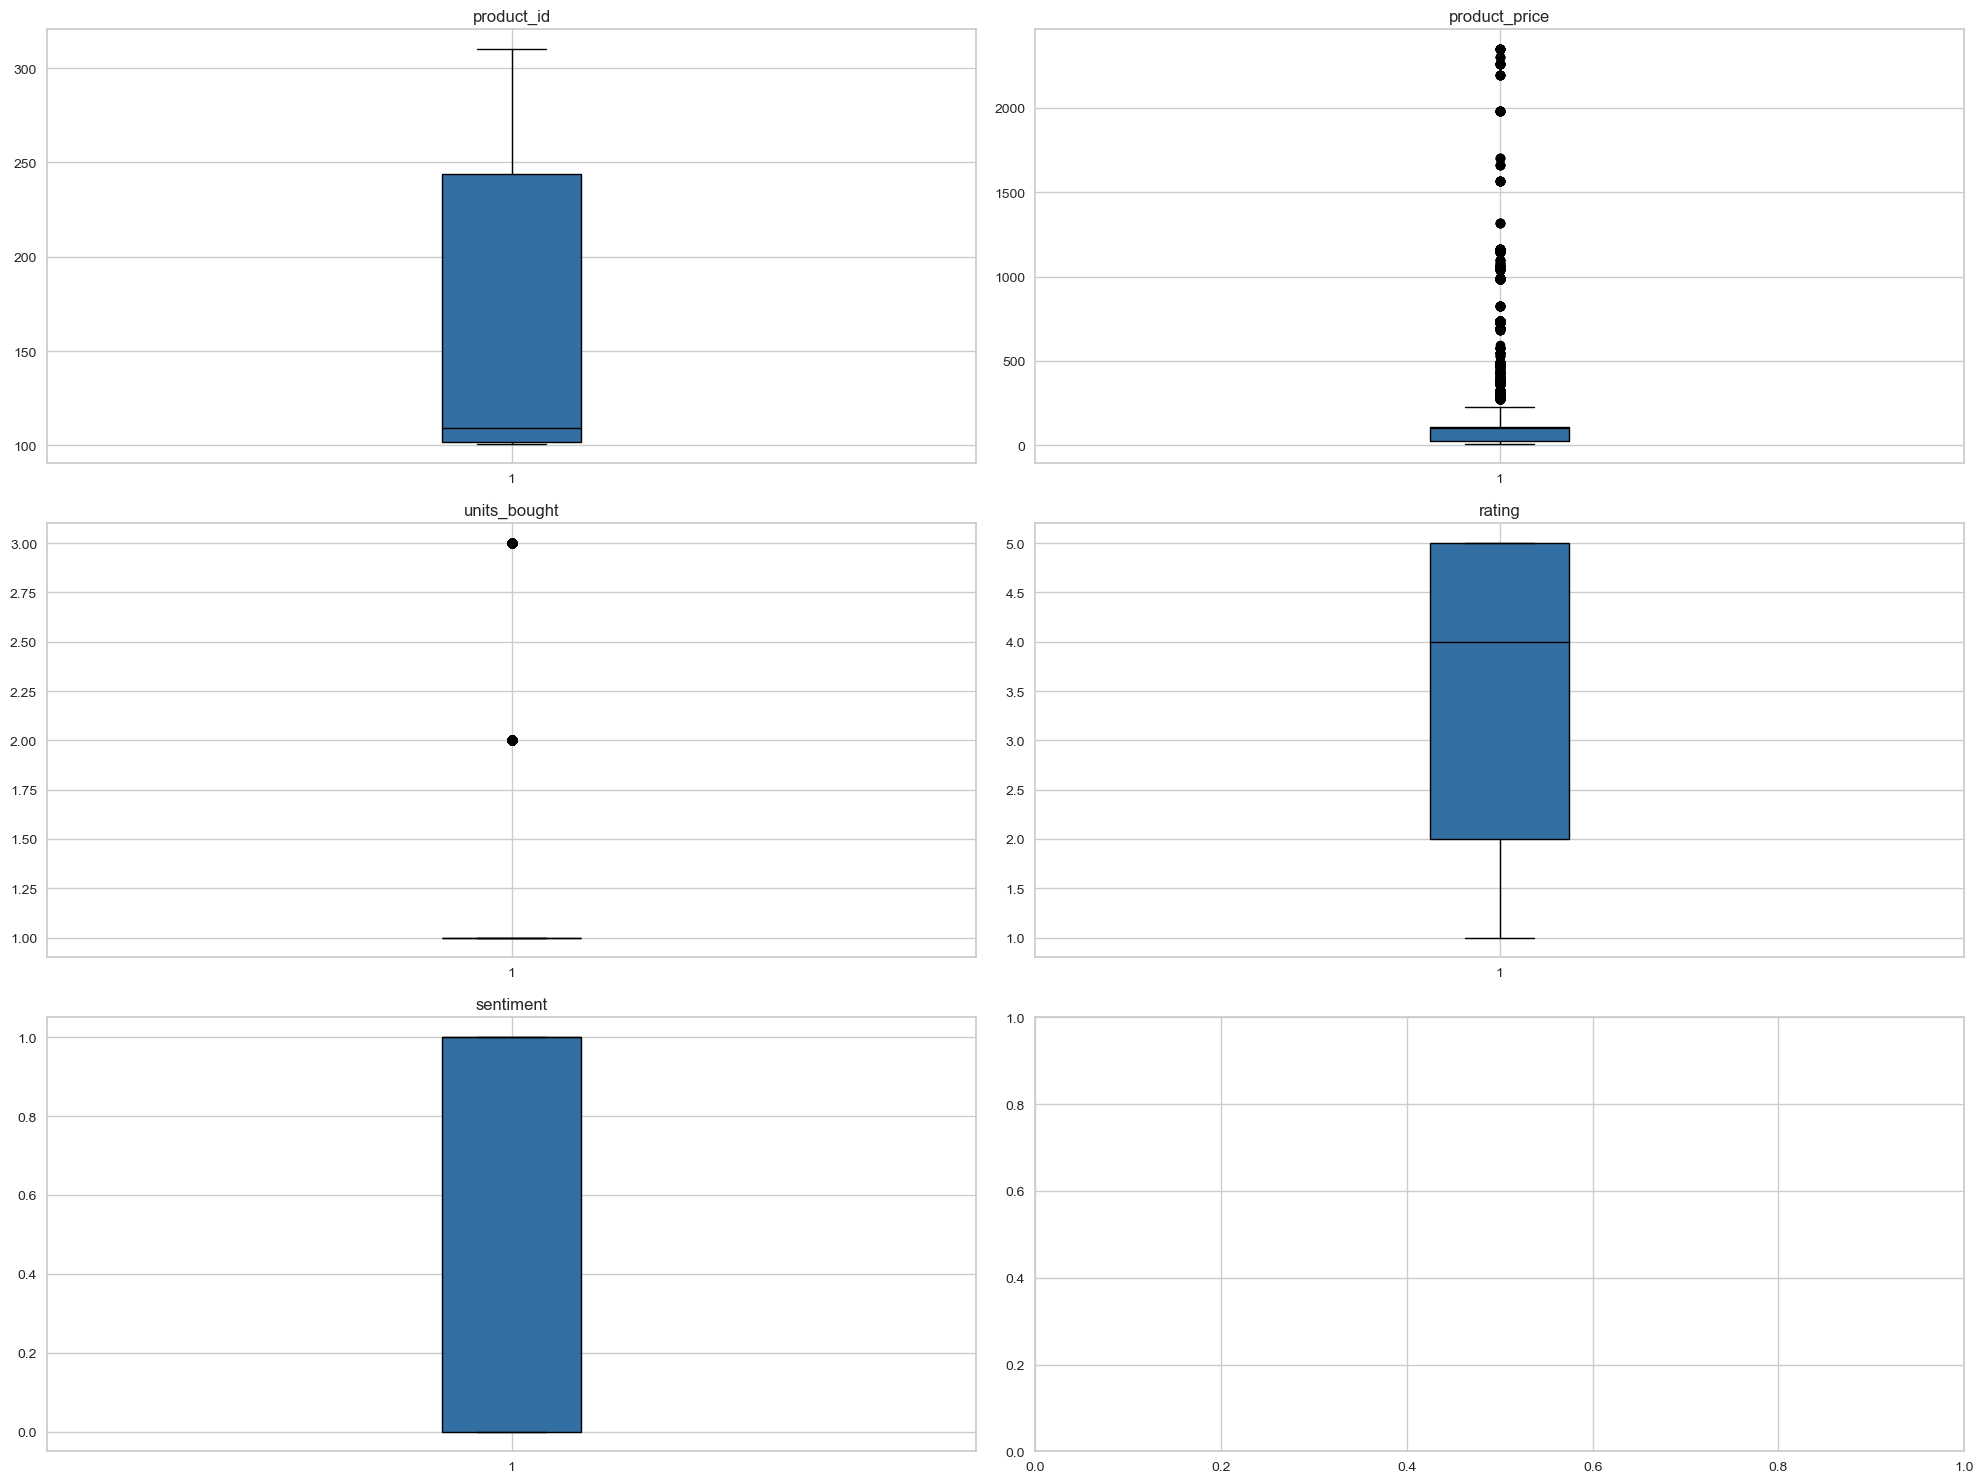

In [ ]:
from funciones.funciones import plot_outliers
plot_outliers(df_reviews)

### 💵 `product_price`
- Se detectan **valores extremos muy altos**, con varios outliers por encima de los \$500 y algunos superando los \$2000.
- Estos podrían representar **productos premium, de lujo o errores de carga**.
- Se considerará tratarlos como outliers en el preprocesamiento para métodos como KMeans.

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">LIMPIEZA DE DATOS</p>

In [ ]:
df_reviews

,product_id,user_id,product_name,category,brand,product_price,units_bought,rating,review_text,product_description,date_of_review,sentiment
0,101,user_5690,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,2,5,The quality of the world-building detail is to...,"Meet the Mindful Reads Sci-Fi Epic Pro, design...",2025-04-10,1
1,310,user_3757,PureBloom Bed Sheets Set Pro,Home & Garden,PureBloom,108.76,1,5,This is a fantastic product. Great value for t...,Experience the next level of home & garden wit...,2023-06-15,1
2,101,user_7081,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,2,2,This is not what I was expecting at all. The w...,"Meet the Mindful Reads Sci-Fi Epic Pro, design...",2024-03-22,0
3,105,user_4525,PageTurner Press Cookbook Ultra,Books,PageTurner Press,30.71,1,4,"Five stars, hands down. I would definitely buy...",PageTurner Press proudly presents the Cookbook...,2024-08-20,1
4,310,user_8451,PureBloom Bed Sheets Set Pro,Home & Garden,PureBloom,108.76,1,4,This is a fantastic product. So happy with thi...,Experience the next level of home & garden wit...,2024-09-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,101,user_7594,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,1,2,Look for other options. The story pacing stopp...,"Meet the Mindful Reads Sci-Fi Epic Pro, design...",2023-03-14,0
9996,108,user_7802,ApexDigital Smartphone Pro,Electronics,ApexDigital,319.03,1,3,It's a decent product for the price. The scree...,Experience the next level of electronics with ...,2024-06-15,1
9997,105,user_4194,PageTurner Press Cookbook Ultra,Books,PageTurner Press,30.71,1,5,Great value for the price. Exceeded my expecta...,PageTurner Press proudly presents the Cookbook...,2023-05-20,1
9998,107,user_2628,KitchenWise LED Desk Lamp Ultra,Home & Garden,KitchenWise,98.41,1,5,The quality of the adjustability is top-notch....,Experience the next level of home & garden wit...,2023-03-27,1


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">GENERACIÓN DE NUEVAS CARACTERÍSTICAS</p>

2. Un segundo objetivo es poder agrupar productos similares en base a sus características (sin considerar los campos reseña y descripción del producto). En consecuencia se le solicita armar una tabla agrupada por productos únicos con al menos 6 features de cada producto y que con esa tabla:


In [ ]:
# Agrupar por producto y calcular estadísticas numéricas
grouped = df_reviews.groupby(['product_id', 'product_name', 'category', 'brand']).agg({
    'product_price': 'mean',
    'units_bought': 'mean',
    'rating': 'mean',
    'user_id': ['count', pd.Series.nunique]
}).reset_index()

# Renombrar columnas
grouped.columns = ['product_id', 'product_name', 'category', 'brand',
                   'avg_price', 'avg_units_bought', 'avg_rating',
                   'total_reviews', 'unique_users']

grouped.head()

,product_id,product_name,category,brand,avg_price,avg_units_bought,avg_rating,total_reviews,unique_users
0,101,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,1.069364,3.238773,2249,1945
1,102,KitchenWise Coffee Maker Series 2,Home & Garden,KitchenWise,103.80,1.060403,3.158837,894,848
2,103,UrbanTrek Running Shoes 948,Apparel,UrbanTrek,144.22,1.048359,3.286701,579,562
3,104,PageTurner Press Mystery Novel 629,Books,PageTurner Press,15.27,1.069231,3.392308,390,377
4,105,PageTurner Press Cookbook Ultra,Books,PageTurner Press,30.71,1.073718,3.173077,312,306


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">ANÁLISIS EXPLORATORIO</p>

### 💵 Distribución del Precio Promedio por Categoría

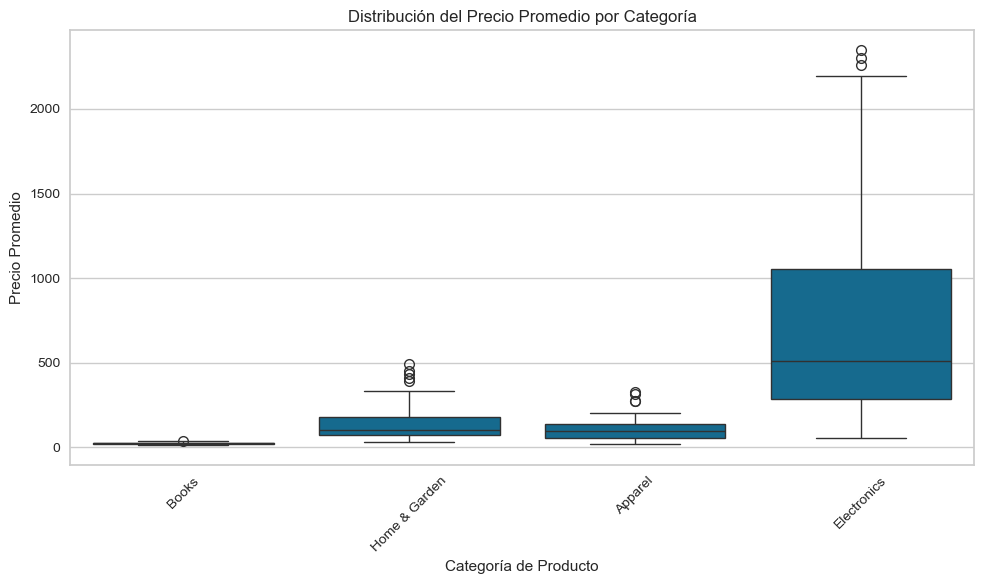

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='avg_price', data=grouped)
plt.title('Distribución del Precio Promedio por Categoría')
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este análisis revela diferencias claras en la estructura de precios según la categoría, siendo Electronics la más cara y Books la más económica.

### ⭐ Rating Promedio por Marca (Top 10)

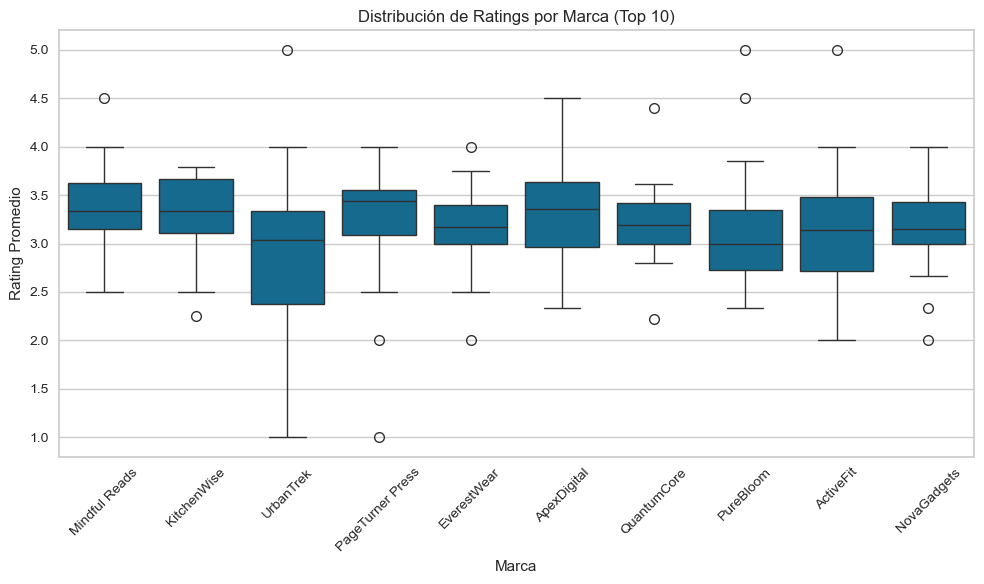

In [ ]:
top_brands = grouped['brand'].value_counts().nlargest(10).index
filtered = grouped[grouped['brand'].isin(top_brands)]

plt.figure(figsize=(10,6))
sns.boxplot(x='brand', y='avg_rating', data=filtered)
plt.title('Distribución de Ratings por Marca (Top 10)')
plt.xlabel('Marca')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El boxplot muestra la dispersión y consistencia de las valoraciones promedio por marca, lo cual permite identificar marcas más estables en percepción del consumidor.

### 📦 Productos con Mayor Promedio de Unidades por Venta

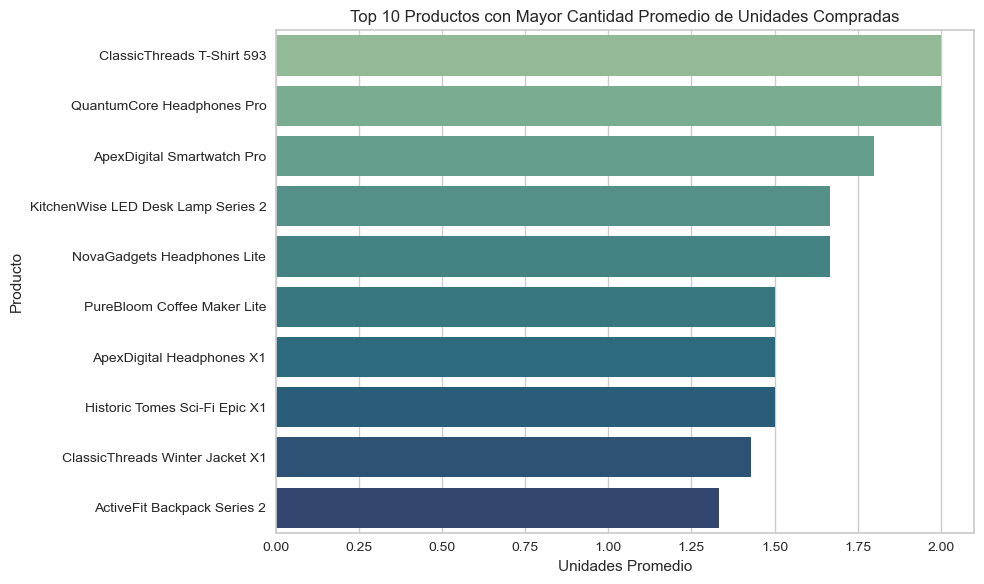

In [ ]:
top_units = grouped.sort_values('avg_units_bought', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='product_name', x='avg_units_bought', data=top_units, palette='crest')
plt.title('Top 10 Productos con Mayor Cantidad Promedio de Unidades Compradas')
plt.xlabel('Unidades Promedio')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


Este gráfico destaca los productos que tienden a comprarse en mayor volumen por transacción, útiles para entender patrones de compra al por mayor o bundles atractivos.

### 🛒 Top 10 Productos con Más Reviews Totales

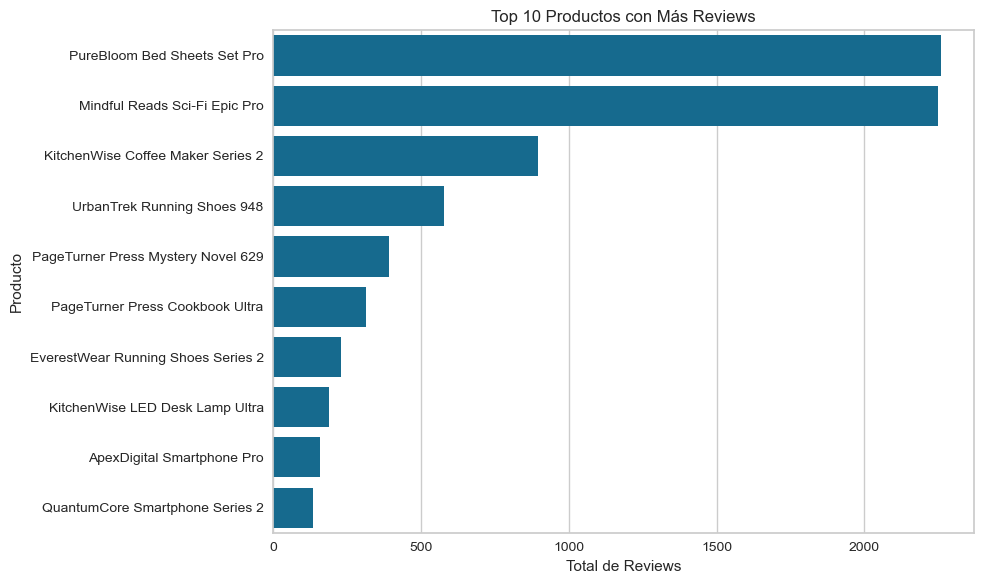

In [ ]:
top_reviews = grouped.sort_values('total_reviews', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='product_name', x='total_reviews', data=top_reviews)
plt.title('Top 10 Productos con Más Reviews')
plt.xlabel('Total de Reviews')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()


Este gráfico nos permite identificar los productos con mayor volumen de retroalimentación del cliente, lo cual puede ser un indicador de popularidad o notoriedad en el catálogo.


## ✅ Conclusión General
El análisis sugiere una estructura de productos diversificada, con ciertas categorías dominando tanto en volumen de reviews como en precios promedio. Productos con mayor número de reviews tienden a estar en categorías más accesibles como libros y hogar, mientras que productos de mayor precio pertenecen a la electrónica. Algunas marcas muestran alta consistencia en su valoración, lo cual representa una oportunidad para reforzar campañas de fidelización basadas en reputación. Además, hay productos con alta cantidad promedio de unidades compradas, ideales para promociones por volumen o estrategias de bundle. 


---

### →  Correlación entre variables

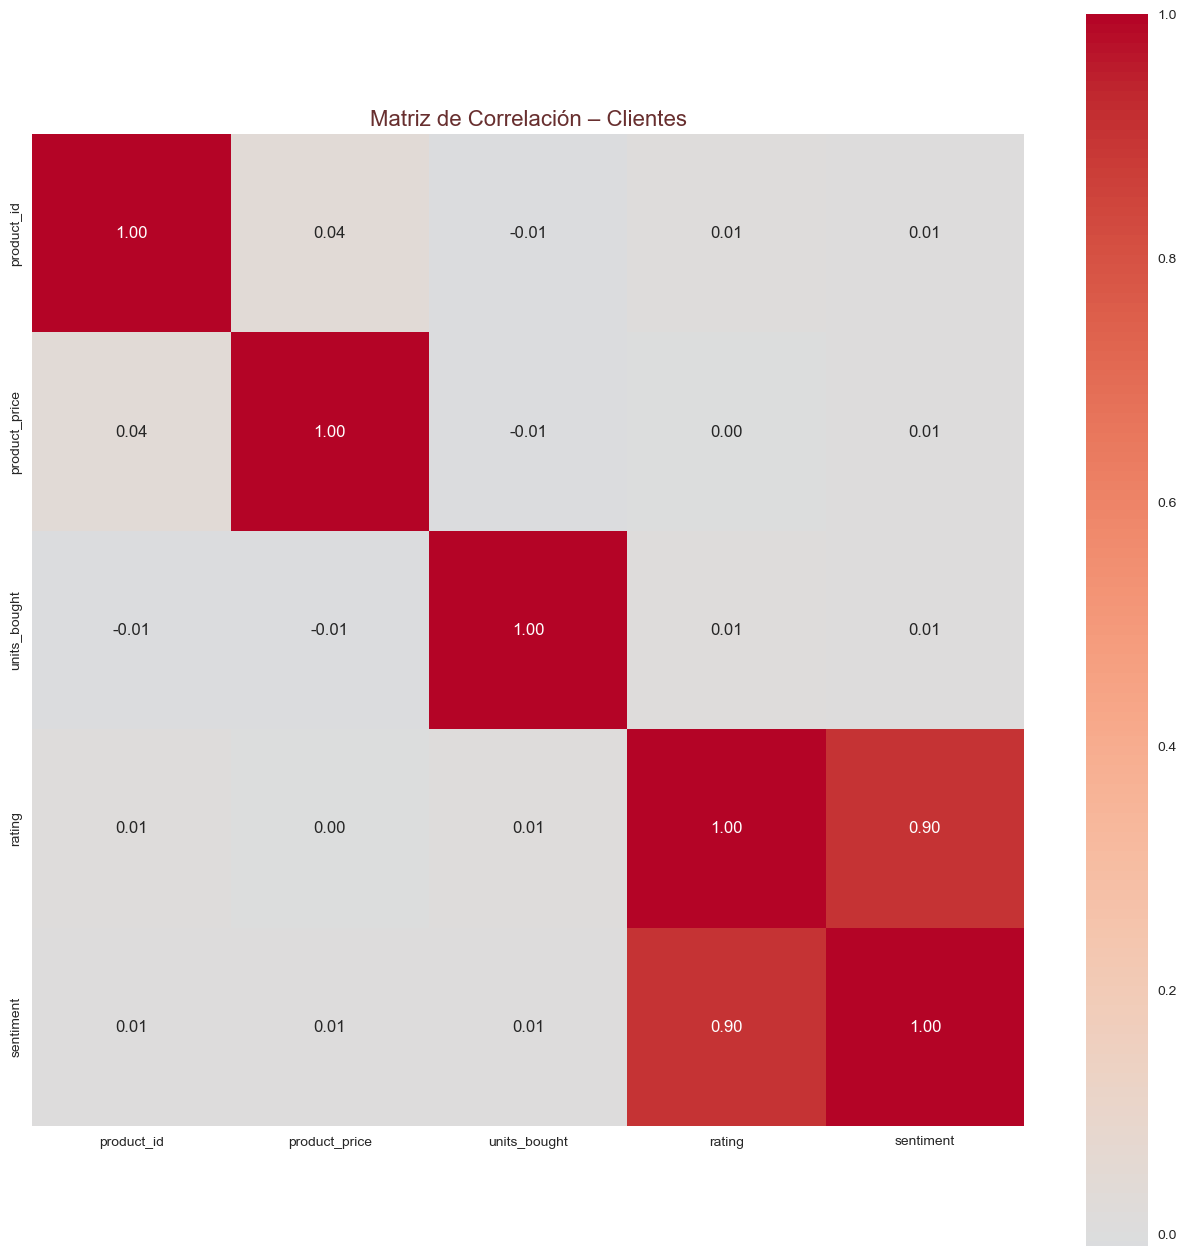

In [ ]:
numeric_data = df_reviews.select_dtypes(include=[np.number])
corrmat = numeric_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0, fmt=".2f", square=True)
plt.title("Matriz de Correlación – Clientes", fontsize=16, color="#682F2F")
plt.show()


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">PREPROCESAMIENTO DE LOS DATOS</p>

In [ ]:
# 1. Log-transform de columnas sesgadas
log_cols = ['avg_price', 'total_reviews', 'unique_users']
grouped_log = grouped.copy()
grouped_log[log_cols] = grouped_log[log_cols].apply(np.log1p)

# 2. One-hot encoding de variables categóricas
dummies = pd.get_dummies(grouped_log[['category', 'brand']], drop_first=True)

# 3. Concatenar con variables numéricas
features = ['avg_price', 'avg_units_bought', 'avg_rating', 'total_reviews', 'unique_users']
data_model = pd.concat([grouped_log[features], dummies], axis=1)
data_model = data_model.astype(float)

# 4. Escalado SIN remover outliers → scaled_df
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data_model)
scaled_df = pd.DataFrame(scaled_array, columns=data_model.columns)

print(f"✅ Escalado completo sin remover outliers → 'scaled_df' generado ({len(scaled_df)} filas, {scaled_df.shape[1]} columnas).")


✅ Escalado completo sin remover outliers → 'scaled_df' generado (209 filas, 22 columnas).


In [ ]:

# 5. Remover outliers (Z-Score)
z_scores = np.abs(zscore(data_model))
mask = (z_scores < 3).all(axis=1)
data_model_clean = data_model[mask].copy()

# 6. Escalar datos sin outliers → scaled_df_clean
scaled_array_clean = scaler.fit_transform(data_model_clean)
scaled_df_clean = pd.DataFrame(scaled_array_clean, columns=data_model_clean.columns)

print(f"✅ Datos sin outliers escalados → 'scaled_df_clean' generado ({len(scaled_df_clean)} filas)")

✅ Datos sin outliers escalados → 'scaled_df_clean' generado (13 filas)


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">REDUCCIÓN DE DIMENSIONALIDAD</p>

En este problema, hay muchos factores (atributos o características) sobre los cuales se va a hacer la clasificación final. Cuantas más características haya, más difícil va a ser trabajar con ellas. Muchas de estas características están correlacionadas y, por lo tanto, son redundantes. Es por eso que voy a hacer una **reducción de dimensionalidad** sobre las características seleccionadas antes de pasar a la parte de clustering.

> *La reducción de dimensionalidad es el proceso de reducir el número de variables aleatorias bajo consideración, obteniendo un conjunto de variables principales.*

---

### 🧠 ¿Qué es PCA?

**El Análisis de Componentes Principales (PCA)** es una técnica para reducir la dimensionalidad de conjuntos de datos de este tipo, aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información.

### ✨ Pasos en esta sección:

- Reducción de dimensionalidad con PCA
- Visualización del dataframe reducido en 3D


### 🔽 Reducción de dimensionalidad con PCA



In [ ]:
# Inicia cronómetro
start_time = time.time()

In [ ]:
# 1. Matriz de covarianza para KMeans (sin outliers)
cov_matrix_kmeans = np.cov(scaled_df_clean.T)
print("✅ Matriz de covarianza para KMeans calculada")

# 1. Matriz de covarianza para Agglomerative/DBSCAN (con outliers)
cov_matrix_others = np.cov(scaled_df.T)
print("✅ Matriz de covarianza para Agglomerative & DBSCAN calculada")


✅ Matriz de covarianza para KMeans calculada
✅ Matriz de covarianza para Agglomerative & DBSCAN calculada


In [ ]:
# 2. Autovalores y Autovectores para KMeans
eig_vals_kmeans, eig_vecs_kmeans = np.linalg.eig(cov_matrix_kmeans)
print("\n🧮 Autovalores (KMeans):")
print(eig_vals_kmeans.round(3))
print("\n🧮 Autovectores (KMeans):")
print(eig_vecs_kmeans.round(3))

# 2. Autovalores y Autovectores para Agglomerative y DBSCAN
eig_vals_others, eig_vecs_others = np.linalg.eig(cov_matrix_others)
print("\n🧮 Autovalores (Agglomerative/DBSCAN):")
print(eig_vals_others.round(3))
print("\n🧮 Autovectores (Agglomerative/DBSCAN):")
print(eig_vecs_others.round(3))



🧮 Autovalores (KMeans):
[2.629 1.501 0.921 0.366 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]

🧮 Autovectores (KMeans):
[[-0.492 -0.315  0.324  0.745 -0.001  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [-0.258 -0.66   0.361 -0.606 -0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.098  0.509  0.85  -0.09   0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [-0.584  0.321 -0.144 -0.188 -0.707  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [-0.584  0.321 -0.144 -0.187  0.707  0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.  

In [ ]:
# 3. Varianza explicada manual para KMeans
total_var_kmeans = eig_vals_kmeans.sum()
explained_var_ratio_kmeans = eig_vals_kmeans / total_var_kmeans
cumulative_var_kmeans = np.cumsum(explained_var_ratio_kmeans)

# 3. Varianza explicada manual para Agglomerative/DBSCAN
total_var_others = eig_vals_others.sum()
explained_var_ratio_others = eig_vals_others / total_var_others
cumulative_var_others = np.cumsum(explained_var_ratio_others)

In [ ]:
# 4. Tabla resumen para KMeans
var_df_kmeans = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(eig_vals_kmeans))],
    'Eigenvalue': eig_vals_kmeans,
    'Explained Variance Ratio': explained_var_ratio_kmeans,
    'Cumulative Variance': cumulative_var_kmeans
}).round(4)

print("📊 Tabla resumen de PCA (KMeans):")
display(var_df_kmeans)

# 4. Tabla resumen para Agglomerative/DBSCAN
var_df_others = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(eig_vals_others))],
    'Eigenvalue': eig_vals_others,
    'Explained Variance Ratio': explained_var_ratio_others,
    'Cumulative Variance': cumulative_var_others
}).round(4)

print("📊 Tabla resumen de PCA (Agglomerative/DBSCAN):")
display(var_df_others)


📊 Tabla resumen de PCA (KMeans):


,PC,Eigenvalue,Explained Variance Ratio,Cumulative Variance
0,PC1,2.6288,0.4853,0.4853
1,PC2,1.5013,0.2772,0.7625
2,PC3,0.9207,0.1700,0.9324
3,PC4,0.3660,0.0676,1.0000
4,PC5,0.0000,0.0000,1.0000
5,PC6,0.0000,0.0000,1.0000
6,PC7,0.0000,0.0000,1.0000
7,PC8,0.0000,0.0000,1.0000
8,PC9,0.0000,0.0000,1.0000
9,PC10,0.0000,0.0000,1.0000


📊 Tabla resumen de PCA (Agglomerative/DBSCAN):


,PC,Eigenvalue,Explained Variance Ratio,Cumulative Variance
0,PC1,3.2001,0.1448,0.1448
1,PC2,2.4321,0.1100,0.2548
2,PC3,2.1370,0.0967,0.3515
3,PC4,0.1084,0.0049,0.3564
4,PC5,0.2161,0.0098,0.3661
5,PC6,0.0000,0.0000,0.3661
6,PC7,1.4127,0.0639,0.4300
7,PC8,0.7626,0.0345,0.4645
8,PC9,1.3017,0.0589,0.5234
9,PC10,0.8401,0.0380,0.5614


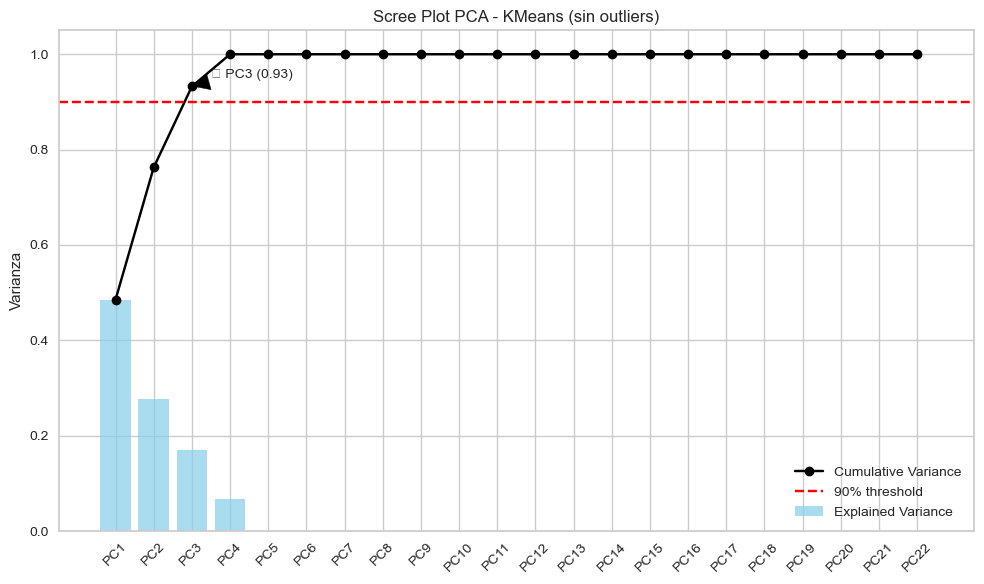

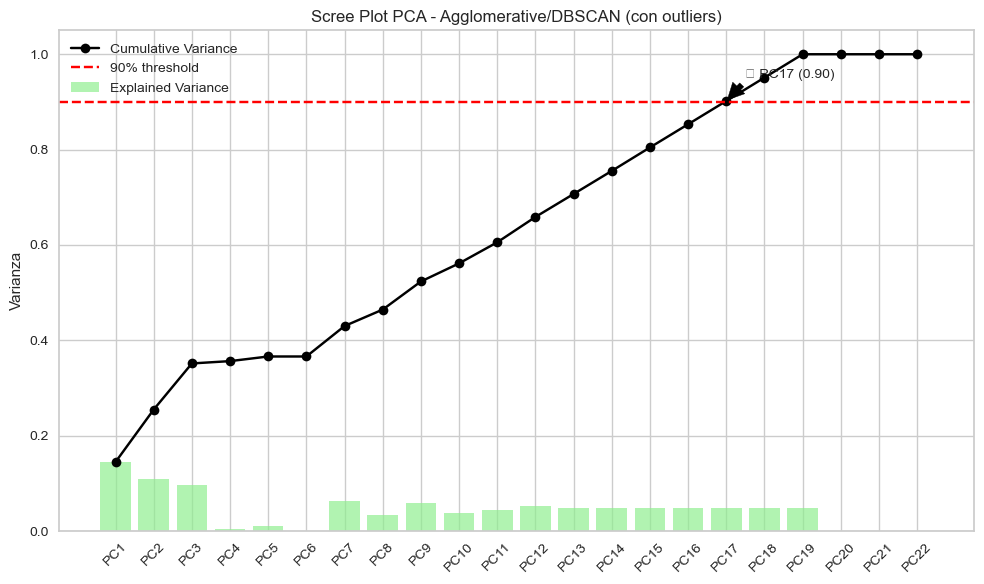

In [ ]:
threshold = 0.90  # podés ajustar este valor más adelante si hacés una visualización o modelado con otro objetivo

# --- Scree plot para KMeans ---
plt.figure(figsize=(10, 6))
plt.bar(var_df_kmeans['PC'], var_df_kmeans['Explained Variance Ratio'], alpha=0.7, color='skyblue', label='Explained Variance')
plt.plot(var_df_kmeans['PC'], var_df_kmeans['Cumulative Variance'], marker='o', color='black', label='Cumulative Variance')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{int(threshold*100)}% threshold')

opt_component_kmeans = np.argmax(var_df_kmeans['Cumulative Variance'] >= threshold)
plt.annotate(f"⭢ {var_df_kmeans['PC'][opt_component_kmeans]} ({var_df_kmeans['Cumulative Variance'][opt_component_kmeans]:.2f})",
             xy=(opt_component_kmeans, var_df_kmeans['Cumulative Variance'][opt_component_kmeans]),
             xytext=(opt_component_kmeans+0.5, threshold+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)
plt.title("Scree Plot PCA - KMeans (sin outliers)")
plt.ylabel("Varianza")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# --- Scree plot para Agglomerative/DBSCAN ---
plt.figure(figsize=(10, 6))
plt.bar(var_df_others['PC'], var_df_others['Explained Variance Ratio'], alpha=0.7, color='lightgreen', label='Explained Variance')
plt.plot(var_df_others['PC'], var_df_others['Cumulative Variance'], marker='o', color='black', label='Cumulative Variance')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{int(threshold*100)}% threshold')

opt_component_others = np.argmax(var_df_others['Cumulative Variance'] >= threshold)
plt.annotate(f"⭢ {var_df_others['PC'][opt_component_others]} ({var_df_others['Cumulative Variance'][opt_component_others]:.2f})",
             xy=(opt_component_others, var_df_others['Cumulative Variance'][opt_component_others]),
             xytext=(opt_component_others+0.5, threshold+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)
plt.title("Scree Plot PCA - Agglomerative/DBSCAN (con outliers)")
plt.ylabel("Varianza")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


| Escenario                                    | Umbral sugerido | Justificación                                                                   |
|---------------------------------------------|------------------|----------------------------------------------------------------------------------|
| Clustering o visualización                   | **80–90%**       | Se busca reducir la dimensionalidad conservando estructura general              |
| Modelado predictivo (PCA antes de ML)        | **95–99%**       | Se quiere máxima retención de información para minimizar pérdida de performance |
| Procesos físicos / científicos (ej. señales) | **>99%**         | Donde cada componente puede tener significado físico relevante                  |
| Visualización 2D / 3D                        | **~70%**         | Para trazar sin perder completamente estructura, pero aceptando pérdida         |


In [ ]:
# PCA para KMeans (sin outliers)
opt_pca_viz_kmeans = np.argmax(cumulative_var_kmeans >= 0.70) + 1
opt_pca_model_kmeans = np.argmax(cumulative_var_kmeans >= 0.90) + 1

print(f"🔍 PCA KMeans - visualización: {opt_pca_viz_kmeans} componentes (≥70%)")
print(f"📦 PCA KMeans - modelado: {opt_pca_model_kmeans} componentes (≥90%)")

# PCA para Agglomerative/DBSCAN (con outliers)
opt_pca_viz_others = np.argmax(cumulative_var_others >= 0.70) + 1
opt_pca_model_others = np.argmax(cumulative_var_others >= 0.90) + 1

print(f"🔍 PCA Agg/DBSCAN - visualización: {opt_pca_viz_others} componentes (≥70%)")
print(f"📦 PCA Agg/DBSCAN - modelado: {opt_pca_model_others} componentes (≥90%)")

🔍 PCA KMeans - visualización: 2 componentes (≥70%)
📦 PCA KMeans - modelado: 3 componentes (≥90%)
🔍 PCA Agg/DBSCAN - visualización: 13 componentes (≥70%)
📦 PCA Agg/DBSCAN - modelado: 17 componentes (≥90%)


In [ ]:
# 7. Fit PCA con ese número óptimo
# ----------- PCA para KMeans (sin outliers) -----------
pca_viz_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit_transform(scaled_df_clean)
pca_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit_transform(scaled_df_clean)

# ----------- PCA para Agglomerative/DBSCAN (con outliers) -----------
pca_viz_others = PCA(n_components=opt_pca_viz_others).fit_transform(scaled_df)
pca_model_others = PCA(n_components=opt_pca_model_others).fit_transform(scaled_df)

In [ ]:
# ----------- Cargas para PCA de visualización (KMeans - sin outliers) -----------
pca_viz_model_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit(scaled_df_clean)
loadings_viz_kmeans = pd.DataFrame(
    pca_viz_model_kmeans.components_.T,
    index=scaled_df_clean.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_viz_kmeans)]
)
print("🎨 Cargas (loadings) - Visualización PCA KMeans (sin outliers):")
display(loadings_viz_kmeans.round(3))


# ----------- Cargas para PCA de visualización (Agg/DBSCAN - con outliers) -----------
pca_viz_model_others = PCA(n_components=opt_pca_viz_others).fit(scaled_df)
loadings_viz_others = pd.DataFrame(
    pca_viz_model_others.components_.T,
    index=scaled_df.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_viz_others)]
)
print("🎨 Cargas (loadings) - Visualización PCA Agg/DBSCAN (con outliers):")
display(loadings_viz_others.round(3))

🎨 Cargas (loadings) - Visualización PCA KMeans (sin outliers):


,PCA1,PCA2
avg_price,0.492,0.315
avg_units_bought,0.258,0.660
avg_rating,-0.098,-0.509
total_reviews,0.584,-0.321
unique_users,0.584,-0.321
category_Books,-0.000,-0.000
category_Electronics,-0.000,-0.000
category_Home & Garden,-0.000,-0.000
brand_ApexDigital,-0.000,-0.000
brand_ClassicThreads,-0.000,-0.000


🎨 Cargas (loadings) - Visualización PCA Agg/DBSCAN (con outliers):


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
avg_price,0.504,0.015,0.089,-0.027,-0.068,0.024,-0.033,0.004,0.009,-0.045,-0.012,0.023,-0.002
avg_units_bought,0.071,-0.013,0.042,-0.061,0.631,-0.179,0.008,0.018,0.001,0.008,0.020,-0.006,-0.003
avg_rating,-0.017,-0.086,0.076,-0.320,0.167,0.461,0.027,-0.025,0.003,0.020,-0.043,-0.009,0.009
total_reviews,-0.068,-0.030,0.660,0.053,-0.068,0.010,0.004,0.012,-0.003,0.000,-0.001,0.004,-0.003
unique_users,-0.067,-0.031,0.660,0.054,-0.068,0.010,0.004,0.011,-0.004,0.000,-0.002,0.005,-0.004
category_Books,-0.439,-0.318,-0.026,-0.252,-0.050,-0.095,-0.023,0.002,0.007,-0.022,-0.004,0.020,-0.006
category_Electronics,0.457,-0.300,0.031,-0.222,-0.086,-0.077,0.007,-0.003,-0.004,0.028,0.008,-0.007,0.002
category_Home & Garden,-0.023,0.598,0.049,-0.276,-0.047,-0.053,-0.005,0.002,-0.005,0.003,-0.003,0.002,-0.004
brand_ApexDigital,0.227,-0.144,0.105,-0.151,0.236,0.025,-0.512,-0.068,0.055,-0.486,-0.115,-0.081,-0.123
brand_ClassicThreads,-0.006,-0.001,-0.023,0.282,0.502,0.022,0.181,0.024,-0.037,0.103,0.228,-0.399,0.245


In [ ]:
# ----------- Cargas para PCA de modelado (KMeans - sin outliers) -----------
pca_model_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit(scaled_df_clean)
loadings_model_kmeans = pd.DataFrame(
    pca_model_model_kmeans.components_.T,
    index=scaled_df_clean.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_model_kmeans)]
)
print("📦 Cargas (loadings) - Modelado PCA KMeans (sin outliers):")
display(loadings_model_kmeans.round(3))


# ----------- Cargas para PCA de modelado (Agg/DBSCAN - con outliers) -----------
pca_model_model_others = PCA(n_components=opt_pca_model_others).fit(scaled_df)
loadings_model_others = pd.DataFrame(
    pca_model_model_others.components_.T,
    index=scaled_df.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_model_others)]
)
print("📦 Cargas (loadings) - Modelado PCA Agg/DBSCAN (con outliers):")
display(loadings_model_others.round(3))


📦 Cargas (loadings) - Modelado PCA KMeans (sin outliers):


,PCA1,PCA2,PCA3
avg_price,0.492,0.315,0.324
avg_units_bought,0.258,0.660,0.361
avg_rating,-0.098,-0.509,0.850
total_reviews,0.584,-0.321,-0.144
unique_users,0.584,-0.321,-0.144
category_Books,-0.000,-0.000,-0.000
category_Electronics,-0.000,-0.000,-0.000
category_Home & Garden,-0.000,-0.000,-0.000
brand_ApexDigital,-0.000,-0.000,-0.000
brand_ClassicThreads,-0.000,-0.000,-0.000


📦 Cargas (loadings) - Modelado PCA Agg/DBSCAN (con outliers):


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
avg_price,0.504,0.015,0.089,-0.027,-0.068,0.024,-0.033,0.004,0.009,-0.045,-0.012,0.023,-0.002,0.046,-0.005,-0.141,0.803
avg_units_bought,0.071,-0.013,0.042,-0.061,0.631,-0.179,0.008,0.018,0.001,0.008,0.020,-0.006,-0.003,-0.183,-0.039,0.710,0.137
avg_rating,-0.017,-0.086,0.076,-0.320,0.167,0.461,0.027,-0.025,0.003,0.020,-0.043,-0.009,0.009,0.108,0.793,0.009,-0.003
total_reviews,-0.068,-0.030,0.660,0.053,-0.068,0.010,0.004,0.012,-0.003,0.000,-0.001,0.004,-0.003,0.196,-0.066,0.088,-0.031
unique_users,-0.067,-0.031,0.660,0.054,-0.068,0.010,0.004,0.011,-0.004,0.000,-0.002,0.005,-0.004,0.196,-0.065,0.087,-0.030
category_Books,-0.439,-0.318,-0.026,-0.252,-0.050,-0.095,-0.023,0.002,0.007,-0.022,-0.004,0.020,-0.006,-0.018,-0.073,-0.029,0.336
category_Electronics,0.457,-0.300,0.031,-0.222,-0.086,-0.077,0.007,-0.003,-0.004,0.028,0.008,-0.007,0.002,-0.013,-0.055,0.021,-0.165
category_Home & Garden,-0.023,0.598,0.049,-0.276,-0.047,-0.053,-0.005,0.002,-0.005,0.003,-0.003,0.002,-0.004,-0.010,-0.012,0.004,0.089
brand_ApexDigital,0.227,-0.144,0.105,-0.151,0.236,0.025,-0.512,-0.068,0.055,-0.486,-0.115,-0.081,-0.123,-0.117,-0.109,-0.233,-0.157
brand_ClassicThreads,-0.006,-0.001,-0.023,0.282,0.502,0.022,0.181,0.024,-0.037,0.103,0.228,-0.399,0.245,0.339,-0.050,-0.354,0.101


In [ ]:
# ----------- Tiempo PCA para visualización (KMeans - sin outliers) -----------
start_viz_kmeans = time.time()
pca_viz_model_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit(scaled_df_clean)
pca_viz_kmeans = pca_viz_model_kmeans.transform(scaled_df_clean)
elapsed_viz_kmeans = time.time() - start_viz_kmeans
print(f"🎨 Tiempo PCA visualización (KMeans - sin outliers): {elapsed_viz_kmeans:.3f} seg")

# ----------- Tiempo PCA para modelado (KMeans - sin outliers) -----------
start_model_kmeans = time.time()
pca_model_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit(scaled_df_clean)
pca_model_kmeans = pca_model_model_kmeans.transform(scaled_df_clean)
elapsed_model_kmeans = time.time() - start_model_kmeans
print(f"📦 Tiempo PCA modelado (KMeans - sin outliers): {elapsed_model_kmeans:.3f} seg")

# ----------- Tiempo PCA para visualización (Agg/DBSCAN - con outliers) -----------
start_viz_others = time.time()
pca_viz_model_others = PCA(n_components=opt_pca_viz_others).fit(scaled_df)
pca_viz_others = pca_viz_model_others.transform(scaled_df)
elapsed_viz_others = time.time() - start_viz_others
print(f"🎨 Tiempo PCA visualización (Agg/DBSCAN - con outliers): {elapsed_viz_others:.3f} seg")

# ----------- Tiempo PCA para modelado (Agg/DBSCAN - con outliers) -----------
start_model_others = time.time()
pca_model_model_others = PCA(n_components=opt_pca_model_others).fit(scaled_df)
pca_model_others = pca_model_model_others.transform(scaled_df)
elapsed_model_others = time.time() - start_model_others
print(f"📦 Tiempo PCA modelado (Agg/DBSCAN - con outliers): {elapsed_model_others:.3f} seg")


🎨 Tiempo PCA visualización (KMeans - sin outliers): 0.002 seg
📦 Tiempo PCA modelado (KMeans - sin outliers): 0.002 seg
🎨 Tiempo PCA visualización (Agg/DBSCAN - con outliers): 0.003 seg
📦 Tiempo PCA modelado (Agg/DBSCAN - con outliers): 0.003 seg


In [ ]:
# ----------- PCA para KMeans (sin outliers) -----------
# Visualización
PCA_viz_df_kmeans = pd.DataFrame(pca_viz_kmeans, columns=[f"PCA{i+1}" for i in range(opt_pca_viz_kmeans)])
PCA_viz_df_kmeans.index = scaled_df_clean.index
print("🎨 DataFrame PCA_viz_df_kmeans creado (visualización sin outliers):")
display(PCA_viz_df_kmeans.head())

# Modelado
PCA_model_df_kmeans = pd.DataFrame(pca_model_kmeans, columns=[f"PCA{i+1}" for i in range(opt_pca_model_kmeans)])
PCA_model_df_kmeans.index = scaled_df_clean.index
print("📦 DataFrame PCA_model_df_kmeans creado (modelado sin outliers):")
display(PCA_model_df_kmeans.head())


# ----------- PCA para Agglomerative / DBSCAN (con outliers) -----------
# Visualización
PCA_viz_df_others = pd.DataFrame(pca_viz_others, columns=[f"PCA{i+1}" for i in range(opt_pca_viz_others)])
PCA_viz_df_others.index = scaled_df.index
print("🎨 DataFrame PCA_viz_df_others creado (visualización con outliers):")
display(PCA_viz_df_others.head())

# Modelado
PCA_model_df_others = pd.DataFrame(pca_model_others, columns=[f"PCA{i+1}" for i in range(opt_pca_model_others)])
PCA_model_df_others.index = scaled_df.index
print("📦 DataFrame PCA_model_df_others creado (modelado con outliers):")
display(PCA_model_df_others.head())


🎨 DataFrame PCA_viz_df_kmeans creado (visualización sin outliers):


,PCA1,PCA2
0,3.004255,-2.144918
1,2.790836,0.080443
2,1.621035,1.058593
3,-0.924085,-0.614051
4,0.037347,0.413785


📦 DataFrame PCA_model_df_kmeans creado (modelado sin outliers):


,PCA1,PCA2,PCA3
0,3.004255,-2.144918,-0.536485
1,2.790836,0.080443,0.713601
2,1.621035,1.058593,0.538818
3,-0.924085,-0.614051,-1.252585
4,0.037347,0.413785,-0.922307


🎨 DataFrame PCA_viz_df_others creado (visualización con outliers):


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,-3.178280,-1.733297,5.309598,-0.390507,-0.951374,1.034097,-0.362320,2.228233,-0.457487,-0.316201,0.899097,-0.459876,0.010472
1,-0.644125,2.194541,5.411088,-0.400410,0.349909,0.243215,0.437661,0.976784,-1.496527,0.736149,-1.617023,1.379576,0.999583
2,-0.427393,-0.178484,4.060873,2.708362,-0.747490,0.172411,-1.435161,1.077319,0.938322,0.862899,-1.317637,0.377445,-0.236817
3,-3.208175,-1.671488,4.155976,-0.049587,-0.590343,-1.567355,0.341915,-1.217686,0.101180,0.019432,-0.524502,-0.980977,0.405050
4,-2.913917,-1.623994,3.946366,0.026021,-0.640544,-1.721730,0.314266,-1.210573,0.105814,-0.010506,-0.514779,-0.967507,0.402019


📦 DataFrame PCA_model_df_others creado (modelado con outliers):


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17
0,-3.178280,-1.733297,5.309598,-0.390507,-0.951374,1.034097,-0.362320,2.228233,-0.457487,-0.316201,0.899097,-0.459876,0.010472,1.338710,-1.293002,1.281150,0.026436
1,-0.644125,2.194541,5.411088,-0.400410,0.349909,0.243215,0.437661,0.976784,-1.496527,0.736149,-1.617023,1.379576,0.999583,0.197897,-0.843815,-0.436382,-0.348073
2,-0.427393,-0.178484,4.060873,2.708362,-0.747490,0.172411,-1.435161,1.077319,0.938322,0.862899,-1.317637,0.377445,-0.236817,1.500189,0.693416,1.008180,0.149760
3,-3.208175,-1.671488,4.155976,-0.049587,-0.590343,-1.567355,0.341915,-1.217686,0.101180,0.019432,-0.524502,-0.980977,0.405050,-0.328528,0.709147,0.237378,-0.162895
4,-2.913917,-1.623994,3.946366,0.026021,-0.640544,-1.721730,0.314266,-1.210573,0.105814,-0.010506,-0.514779,-0.967507,0.402019,-0.415775,0.455558,0.151403,0.271672


In [ ]:
# ----------- Interpretación PCA visualización (KMeans - sin outliers) -----------
print("\n🎨 Interpretación de componentes - PCA para visualización (KMeans):")
for i in range(opt_pca_viz_kmeans):
    top_vars = loadings_viz_kmeans.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")

# ----------- Interpretación PCA modelado (KMeans - sin outliers) -----------
print("\n📦 Interpretación de componentes - PCA para modelado (KMeans):")
for i in range(opt_pca_model_kmeans):
    top_vars = loadings_model_kmeans.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")


# ----------- Interpretación PCA visualización (Agg/DBSCAN - con outliers) -----------
print("\n🎨 Interpretación de componentes - PCA para visualización (Agg/DBSCAN):")
for i in range(opt_pca_viz_others):
    top_vars = loadings_viz_others.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")

# ----------- Interpretación PCA modelado (Agg/DBSCAN - con outliers) -----------
print("\n📦 Interpretación de componentes - PCA para modelado (Agg/DBSCAN):")
for i in range(opt_pca_model_others):
    top_vars = loadings_model_others.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")



🎨 Interpretación de componentes - PCA para visualización (KMeans):
🔎 PCA1 influido por: unique_users, total_reviews, avg_price
🔎 PCA2 influido por: avg_units_bought, avg_rating, total_reviews

📦 Interpretación de componentes - PCA para modelado (KMeans):
🔎 PCA1 influido por: unique_users, total_reviews, avg_price
🔎 PCA2 influido por: avg_units_bought, avg_rating, total_reviews
🔎 PCA3 influido por: avg_rating, avg_units_bought, avg_price

🎨 Interpretación de componentes - PCA para visualización (Agg/DBSCAN):
🔎 PCA1 influido por: avg_price, category_Electronics, category_Books
🔎 PCA2 influido por: category_Home & Garden, category_Books, category_Electronics
🔎 PCA3 influido por: unique_users, total_reviews, brand_KitchenWise
🔎 PCA4 influido por: brand_UrbanTrek, brand_EverestWear, avg_rating
🔎 PCA5 influido por: avg_units_bought, brand_ClassicThreads, brand_StellarTech
🔎 PCA6 influido por: avg_rating, brand_PageTurner Press, brand_EverestWear
🔎 PCA7 influido por: brand_NovaGadgets, brand

---

### 🔽 Reducción de dimensionalidad con t-SNE

In [ ]:
print(scaled_df_clean.shape[0])


13


🔹 Ejecutando t-SNE con 2 componentes...
✅ Trustworthiness 2D: 0.8154
⏱️ Tiempo: 0.30 seg


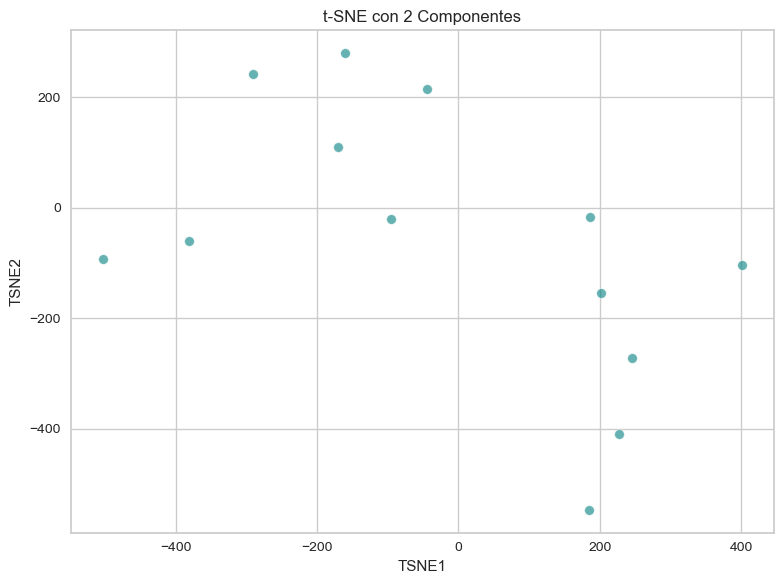

In [ ]:
trust_scores = {}

# ----------- t-SNE con 2 componentes -----------
print("🔹 Ejecutando t-SNE con 2 componentes...")
start = time.time()
tsne_2 = TSNE(n_components=2, perplexity=4, learning_rate=200, n_iter=1000, random_state=42)
tsne_result_2d = tsne_2.fit_transform(scaled_df_clean)
trust_2d = trustworthiness(scaled_df_clean, tsne_result_2d, n_neighbors=5)
trust_scores[2] = trust_2d
print(f"✅ Trustworthiness 2D: {trust_2d:.4f}")
print(f"⏱️ Tiempo: {time.time() - start:.2f} seg")

# Gráfico 2D
tsne_df_2d = pd.DataFrame(tsne_result_2d, columns=["TSNE1", "TSNE2"])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df_2d, x="TSNE1", y="TSNE2", alpha=0.6, color='teal')
plt.title("t-SNE con 2 Componentes")
plt.grid(True)
plt.tight_layout()
plt.show()

## 🎯 ¿Por qué se eligieron **2 componentes** para t-SNE?

A diferencia de PCA, t-SNE no busca maximizar la varianza explicada, sino **preservar las relaciones locales** entre los puntos del espacio original. En este caso:

- El dataset contiene una cantidad moderada de productos únicos (~100).
- Se necesita una representación visual clara para interpretar agrupamientos de productos.
- Evaluar en 2D es ideal para visualizaciones rápidas e interpretables.

---

### 📊 Resultados obtenidos en t-SNE para productos

La visualización 2D muestra:

- Agrupamientos **compactos y bien definidos**, lo que sugiere que existen **tipos de productos con características similares** (precio, rating, marca, categoría, etc.).
- Poca superposición entre grupos → lo que favorece una posterior aplicación de clustering.
- Posibles **clusters naturales** como productos de lujo (alto precio y pocas unidades) vs. productos masivos (precio bajo y alto volumen de ventas).

---

### ✅ Conclusión

- La elección de 2 componentes fue adecuada para este problema: la separación visual sugiere que el espacio embebido conserva relaciones locales relevantes entre productos.
- t-SNE es ideal en este caso porque permite ver si productos con **categorías, marcas o comportamientos distintos en ventas** tienden a agruparse o diferenciarse.
- Esta representación es útil para que el equipo de Marketplace proponga estrategias de producto o precio segmentadas según grupos similares.


---

### 🔽 Reducción de dimensionalidad con UMAP

🔹 Ejecutando UMAP con 2 componentes...
✅ Trustworthiness 2D: 0.7785
⏱️ Tiempo: 0.03 seg


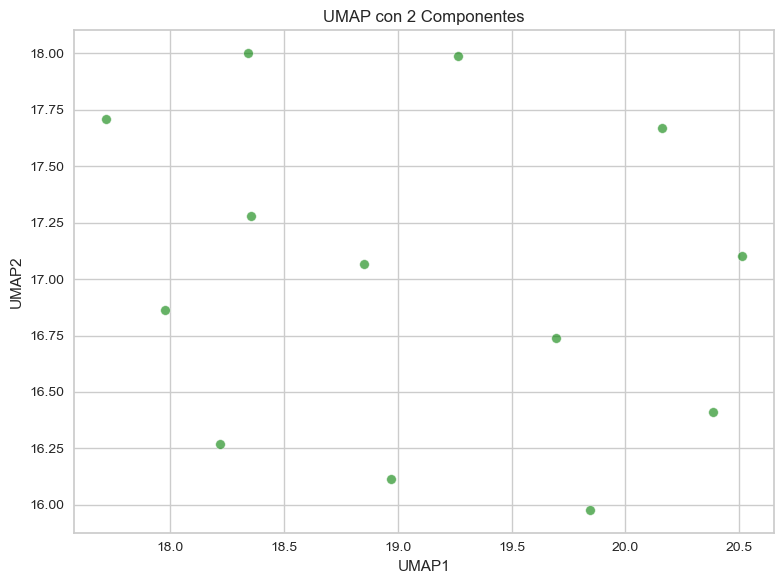

In [ ]:
umap_scores = {}

# ----------- UMAP con 2 componentes -----------
print("🔹 Ejecutando UMAP con 2 componentes...")
start = time.time()
umap_2 = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
umap_result_2d = umap_2.fit_transform(scaled_df_clean)
trust_umap_2d = trustworthiness(scaled_df_clean, umap_result_2d, n_neighbors=5)
umap_scores[2] = trust_umap_2d
print(f"✅ Trustworthiness 2D: {trust_umap_2d:.4f}")
print(f"⏱️ Tiempo: {time.time() - start:.2f} seg")

# Gráfico 2D
umap_df_2d = pd.DataFrame(umap_result_2d, columns=["UMAP1", "UMAP2"])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df_2d, x="UMAP1", y="UMAP2", alpha=0.6, color='green')
plt.title("UMAP con 2 Componentes")
plt.grid(True)
plt.tight_layout()
plt.show()

## 🎯 ¿Por qué se eligieron **2 componentes** para UMAP?

UMAP  no se basa en varianza explicada como PCA, sino en la **preservación de vecindades locales** en el espacio original. En este análisis se aplicó sobre una tabla de productos únicos, construida a partir del agrupamiento por `product_id` y enriquecida con variables como:

- Precio promedio (`avg_price`)
- Unidades promedio compradas (`avg_units_bought`)
- Rating promedio (`avg_rating`)
- Total de reseñas (`total_reviews`)
- Cantidad de usuarios únicos (`unique_users`)
- Categoría y marca codificadas (`category`, `brand`)

Para definir la cantidad de componentes se compararon las proyecciones en **2D y 3D**, considerando:

- 🔬 **Trustworthiness**, como métrica cuantitativa de preservación estructural.
- 📊 Claridad en la visualización de agrupamientos de productos.
- 🕒 Tiempo de ejecución.


### ✅ Conclusión

- La visualización 2D con UMAP mostró una **separación clara, compacta y bien definida de grupos de productos**.

> ✅ UMAP con 2 componentes fue seleccionado como el método óptimo para representar visualmente la diversidad de productos del e-commerce, en base a sus características comerciales clave.


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

b. Separe los productos en el número de clusters que considere indicado utilizando al menos dos de los siguientes métodos: K-Means, Jerárquico y DBSCAN y eligiendo el método que mejor separación haga en base a sus criterios debidamente justificados.

  

Con las dimensiones reducidas mediante PCA, voy a aplicar técnicas de **clustering no supervisado** para segmentar a los clientes.  
Los 2 algoritmos a implementar para comparar resultados son:

1. **KMeans**
2. **Agglomerative Clustering**

---


## **K-Means**

El algoritmo **KMeans** divide los datos en un número definido de grupos, minimizando la distancia interna de cada punto con respecto al centroide de su grupo.

Para determinar el número óptimo de clusters (`k`), se utilizaron tres enfoques complementarios de evaluación:

1. **Método del codo (Inercia)**: Detecta el punto donde agregar más clusters deja de mejorar significativamente la compactación.
2. **Silhouette Score**: Mide qué tan bien separados están los clusters.
3. **Índice de Calinski-Harabasz**: Evalúa la relación entre la dispersión interna y externa de los clusters.


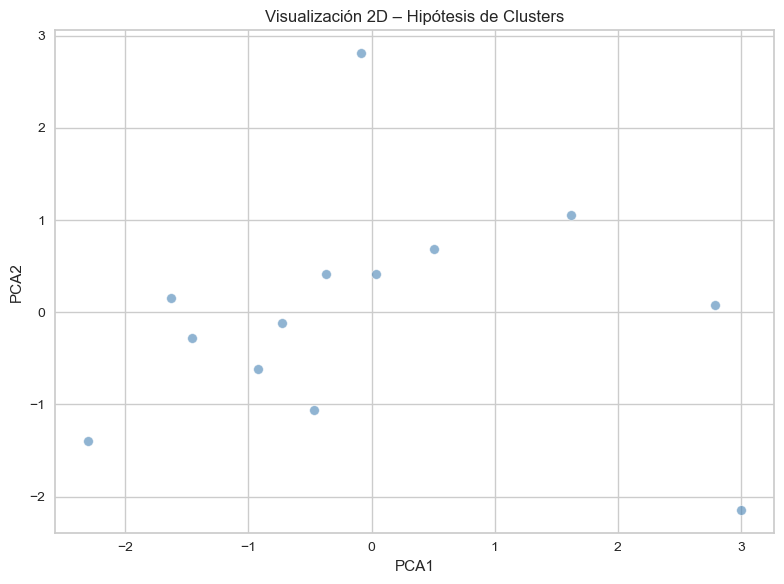

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=PCA_viz_df_kmeans.values[:, 0],
    y=PCA_viz_df_kmeans.values[:, 1],
    alpha=0.6,
    color="steelblue"
)

plt.title("Visualización 2D – Hipótesis de Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.tight_layout()
plt.show()

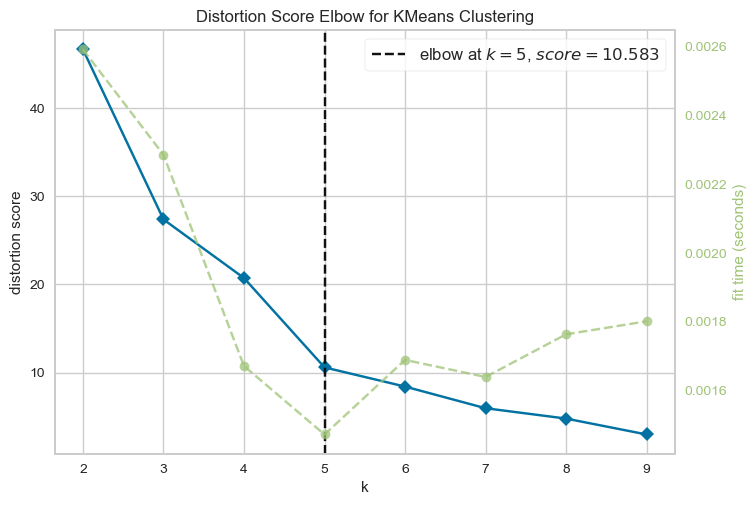

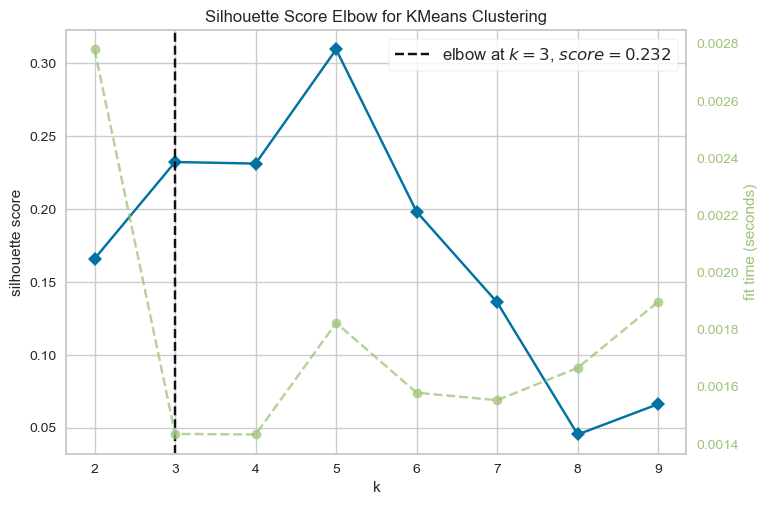

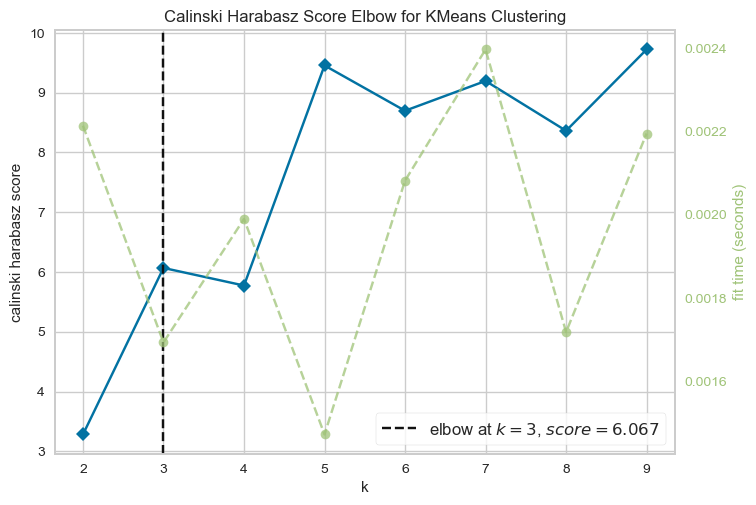

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# 1. Distortion (Inercia)
model_inertia = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='distortion')
model_inertia.fit(PCA_model_df_kmeans)
model_inertia.show()

# 2. Silhouette
model_silhouette = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='silhouette')
model_silhouette.fit(PCA_model_df_kmeans)
model_silhouette.show()

# 3. Calinski-Harabasz
model_calinski = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='calinski_harabasz')
model_calinski.fit(PCA_model_df_kmeans)
model_calinski.show()


## 📊 Evaluación de KMeans según Distintas Métricas

Se evaluó el algoritmo **KMeans** con valores de `k` entre 2 y 9 utilizando tres métricas distintas para determinar el número óptimo de clusters.

---

### 🔶 1. **Distortion Score (Inercia / SSE)**  
- Mide la **suma de las distancias cuadradas** de cada punto a su centroide más cercano.  
- **Cuanto menor es el valor, mejor**, pero se busca el “codo” donde la mejora se estabiliza.  
- El gráfico muestra un claro punto de inflexión en **`k = 5`**, donde la reducción marginal de la distorsión comienza a ser menos significativa.  

📌 **Conclusión:** El método del codo sugiere que el valor óptimo sería **`k = 5`**, representando una buena compactación sin sobreajuste.

---

### 🔸 2. **Silhouette Score**  
- Evalúa la **cohesión y separación** de los clusters (rango de -1 a 1).  
- **Un mayor valor indica clusters mejor definidos.**  
- El puntaje máximo se alcanza en **`k = 3`**, con un **score ≈ 0.232**, y se observa una caída posterior al aumentar `k`.  

📌 **Conclusión:** Según esta métrica, **`k = 3`** sería el valor óptimo, reflejando una buena separación entre los grupos sin perder cohesión interna.

---

### 🔹 3. **Calinski-Harabasz Index**  
- Mide la **razón entre dispersión inter-cluster e intra-cluster**.  
- **Cuanto mayor, mejor.**  
- El índice alcanza su valor más alto también en **`k = 3`**, con una clara caída posterior para valores mayores de `k`.

📌 **Conclusión:** Coincide con el Silhouette Score en que **`k = 3`** ofrece la mejor segmentación.

---

### ✅ **Conclusión Final Integrada**  
> Existen dos lecturas posibles según los criterios evaluados:  
> - **`k = 3`**: sugerido por Silhouette y Calinski-Harabasz, refleja una segmentación clara y natural entre tres grupos diferenciados.  
> - **`k = 5`**: recomendado por el método del codo (distortion), propone una segmentación más granular que podría capturar matices adicionales.

🔍 **Recomendación práctica:** Se opta por continuar con **`k = 3`**, ya que está respaldado por **dos métricas de calidad de clustering**, y permite una segmentación equilibrada, bien separada y fácil de interpretar desde una perspectiva de negocio.


In [ ]:
# Comparación explícita de métricas
scores = {
    "Inercia": model_inertia.elbow_score_,
    "Silhouette": model_silhouette.elbow_score_,
    "Calinski": model_calinski.elbow_score_
}

# Elegir la mejor métrica
best_metric = max(scores, key=scores.get)
print(f"✅ Métrica ganadora: {best_metric}")

# Obtener el mejor valor de K
optimal_k = {
    "Inercia": model_inertia.elbow_value_,
    "Silhouette": model_silhouette.elbow_value_,
    "Calinski": model_calinski.elbow_value_
}[best_metric]

print(f"🔢 K óptimo seleccionado para KMeans: {optimal_k}")

# Aplicar KMeans con scaled_df_clean y PCA_model_df (ambos sin outliers)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
yhat_kmeans = kmeans.fit_predict(PCA_model_df_kmeans)

# Crear DataFrame para guardar resultados
PCA_cluster_df_kmeans = PCA_model_df_kmeans.copy()
PCA_cluster_df_kmeans["cluster_kmeans"] = yhat_kmeans

# Mostrar primeros resultados
print("📦 Clustering KMeans aplicado (sin outliers):")
display(PCA_cluster_df_kmeans.head())


✅ Métrica ganadora: Silhouette
🔢 K óptimo seleccionado para KMeans: 3
📦 Clustering KMeans aplicado (sin outliers):


,PCA1,PCA2,PCA3,cluster_kmeans
0,3.004255,-2.144918,-0.536485,2
1,2.790836,0.080443,0.713601,2
2,1.621035,1.058593,0.538818,0
3,-0.924085,-0.614051,-1.252585,0
4,0.037347,0.413785,-0.922307,0


---

## **Agglomerative**

El algoritmo **Agglomerative Clustering** forma grupos jerárquicos mediante la fusión progresiva de observaciones similares.  
Voy a usar el mismo número de clusters sugerido por el método del codo.


In [ ]:
# Aplicar Agglomerative Clustering con el K óptimo (mismo K usado en KMeans para comparar)
agg_model = AgglomerativeClustering(n_clusters=optimal_k)
yhat_agg = agg_model.fit_predict(PCA_model_df_others)

# Crear DataFrame con resultados (basado en PCA_model_df que incluye outliers)
PCA_cluster_df_agg = PCA_model_df_others.copy()
PCA_cluster_df_agg["cluster_agg"] = yhat_agg

# Mostrar resultados
print("📦 Clustering Agglomerativo aplicado (con outliers):")
display(PCA_cluster_df_agg.head())

📦 Clustering Agglomerativo aplicado (con outliers):


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,cluster_agg
0,-3.178280,-1.733297,5.309598,-0.390507,-0.951374,1.034097,-0.362320,2.228233,-0.457487,-0.316201,0.899097,-0.459876,0.010472,1.338710,-1.293002,1.281150,0.026436,0
1,-0.644125,2.194541,5.411088,-0.400410,0.349909,0.243215,0.437661,0.976784,-1.496527,0.736149,-1.617023,1.379576,0.999583,0.197897,-0.843815,-0.436382,-0.348073,0
2,-0.427393,-0.178484,4.060873,2.708362,-0.747490,0.172411,-1.435161,1.077319,0.938322,0.862899,-1.317637,0.377445,-0.236817,1.500189,0.693416,1.008180,0.149760,3
3,-3.208175,-1.671488,4.155976,-0.049587,-0.590343,-1.567355,0.341915,-1.217686,0.101180,0.019432,-0.524502,-0.980977,0.405050,-0.328528,0.709147,0.237378,-0.162895,4
4,-2.913917,-1.623994,3.946366,0.026021,-0.640544,-1.721730,0.314266,-1.210573,0.105814,-0.010506,-0.514779,-0.967507,0.402019,-0.415775,0.455558,0.151403,0.271672,4


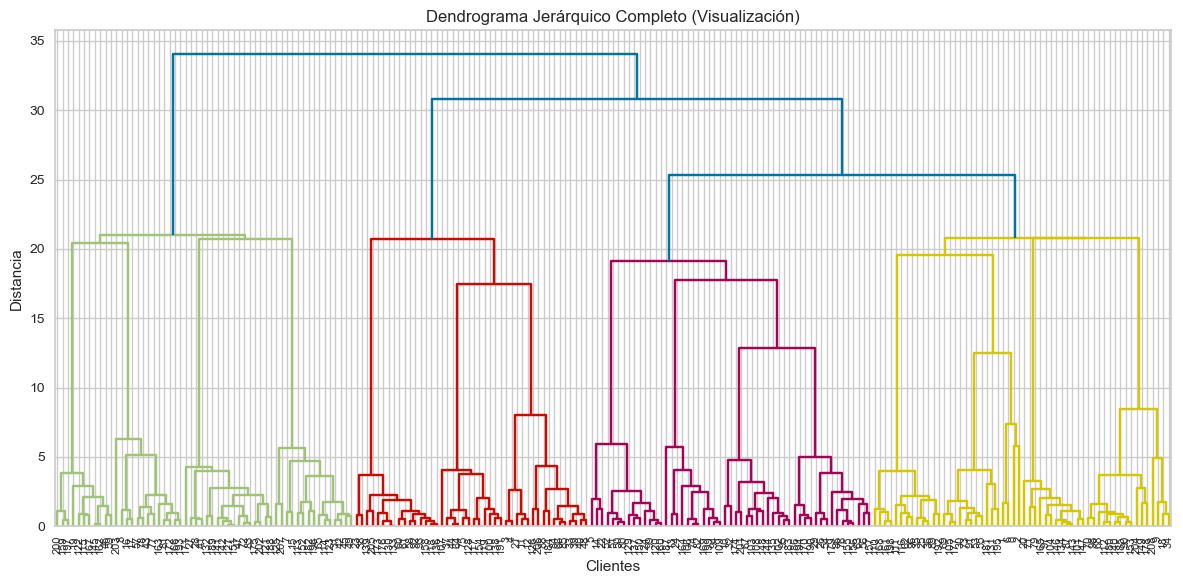

In [ ]:
# En este caso, usás PCA_viz_df para una visualización más limpia
mergings = linkage(PCA_viz_df_others, method='ward')

# Dendrograma jerárquico
plt.figure(figsize=(12, 6))
dendrogram(mergings, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrograma Jerárquico Completo (Visualización)")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.grid(True)
plt.tight_layout()
plt.show()

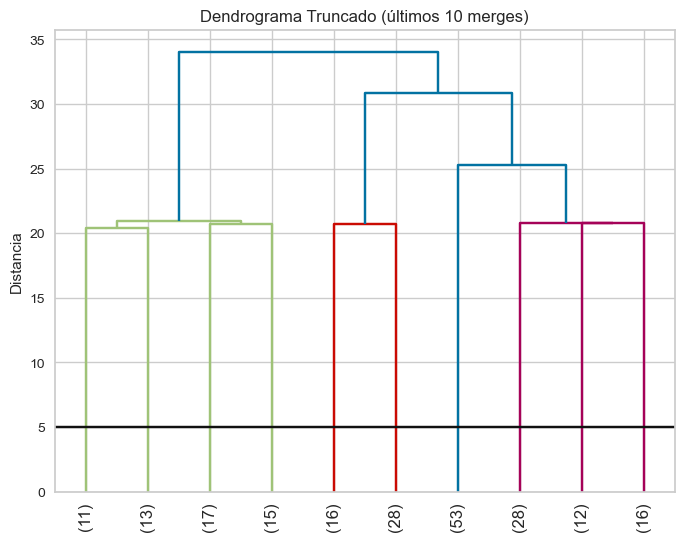

In [ ]:
plt.figure(figsize=(8, 6))
dendrogram(mergings,
           truncate_mode='lastp',
           p=10, # si para kmeans use k=5, para hacer el truncado puedo usar el doble de kmeans --> p=10
           leaf_rotation=90,
           leaf_font_size=12,
)
plt.axhline(y=5, c='k')  # línea horizontal para sugerir corte en clusters
plt.title("Dendrograma Truncado (últimos 10 merges)")
plt.ylabel("Distancia")
plt.show()

## 🌿 Dendrograma Jerárquico (Truncado)

El dendrograma es una herramienta visual que permite observar la estructura jerárquica del agrupamiento aglomerativo.  
En este caso, se utiliza el **modo truncado** para mostrar únicamente los **últimos 10 merges**, lo que facilita la interpretación sin sobrecargar el gráfico.

---

### 📌 Observaciones clave:

- Cada número en la base representa la **cantidad de observaciones** agrupadas en cada fusión.
- La **altura de las líneas verticales** indica la **distancia (disimilitud)** a la que se unieron los grupos.
- Una línea horizontal (por ejemplo, a **y = 5**) permite estimar visualmente cuántos clústeres naturales hay.  
  En este gráfico, cortar a esa altura sugiere la existencia de **5 clústeres principales**.
- Se observa una **estructura ramificada clara**, con fusiones que se alejan gradualmente, lo cual indica una jerarquía rica y natural en los datos.

---

### ✅ Conclusión:

Este dendrograma respalda la elección de **5 clústeres** como valor adecuado para `n_clusters` en el modelo `AgglomerativeClustering`.  
Además, refuerza la idea de que el enfoque jerárquico es apropiado, ya que permite explorar agrupamientos con distintos niveles de granularidad y ofrece interpretabilidad visual directa.

> 📌 Esta segmentación puede ser valiosa para estrategias diferenciadas, donde los grupos representan perfiles de producto o comportamiento con características comunes.


---

## **Comparativa Visual**

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Títulos de los métodos
titles = ["KMeans", "Agglomerative"]

# Datasets correctos para visualización 3D
viz_datasets = [
    (PCA_model_df_kmeans, PCA_cluster_df_kmeans["cluster_kmeans"]),
    (PCA_model_df_others, PCA_cluster_df_agg["cluster_agg"])
]

# Crear figura con 2 subplots 3D
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scene'}]*2],
    subplot_titles=titles,
    horizontal_spacing=0.08
)

# Agregar cada trazado al subplot correspondiente
for i, (df_pca, clusters) in enumerate(viz_datasets):
    fig.add_trace(
        go.Scatter3d(
            x=df_pca["PCA1"],
            y=df_pca["PCA2"],
            z=df_pca["PCA3"],
            mode='markers',
            marker=dict(
                size=3,
                color=clusters,
                colorscale='Viridis',
                opacity=0.75,
                showscale=False
            ),
            name=titles[i]
        ),
        row=1,
        col=i+1
    )

# Configuración del layout
fig.update_layout(
    height=500,
    width=1000,
    title_text="Comparación 3D de Clustering: KMeans vs Agglomerative",
    showlegend=False,
    margin=dict(l=20, r=20, t=50, b=20)
)

# Etiquetas de ejes para cada subplot
for i in range(1, 3):
    fig.update_layout({
        f"scene{i}": dict(
            xaxis_title="PCA1",
            yaxis_title="PCA2",
            zaxis_title="PCA3"
        )
    })

fig.show()


## 📊 Comparación 3D de Métodos de Clustering (PCA1, PCA2 y PCA3)

### 🔹 KMeans
- Crea **clústeres esféricos bien definidos** y claramente separados.
- Muestra una **segmentación consistente** y útil para campañas de marketing o análisis operativo.
- Ideal cuando se busca una **asignación inequívoca de cada cliente a un grupo**.


### 🔸 Agglomerative Clustering
- La estructura resultante es **similar a KMeans**, aunque los grupos presentan **fronteras menos suaves** y transiciones más abruptas.
- Refleja **jerarquías naturales** entre segmentos.
- Útil en contextos donde es relevante conocer la relación entre subgrupos (por ejemplo, niveles de fidelidad).

### ✅ Conclusión General

- **KMeans**: el método más recomendable para realizar una **segmentación operativa y accionable** a gran escala.
- **Agglomerative Clustering**: agrega valor al identificar **relaciones jerárquicas** entre clientes.



<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUACIÓN DE MODELOS</p>

c. Describa brevemente las características de cada cluster.


Dado que este es un problema de **clustering no supervisado**, no contamos con etiquetas verdaderas para evaluar el rendimiento de forma clásica.  
Por lo tanto, voy a evaluar la **calidad y utilidad de los clusters formados** mediante análisis exploratorio y visual.


## 🎯 Objetivo de esta sección:

- Ver cómo se distribuyen los clientes en los clusters formados
- Analizar las variables clave como gasto, recencia, ticket promedio y frecuencia
- Identificar si hay patrones útiles o perfiles destacables en los grupos


In [ ]:
# Asignación de clusters a los dataframes correctos
data_model_clean = data_model_clean.copy()
data_model_clean["cluster_kmeans"] = PCA_cluster_df_kmeans["cluster_kmeans"].values

data_model = data_model.copy()
data_model["cluster_agg"] = PCA_cluster_df_agg["cluster_agg"].values


---

## 1) Contador de distribución por método

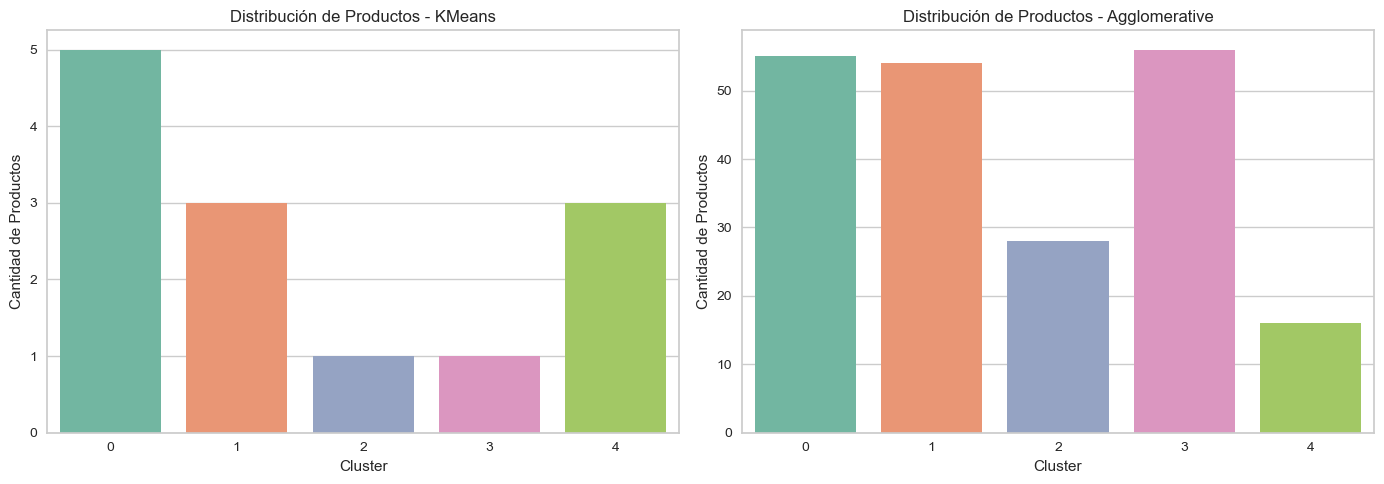

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KMeans (sin outliers)
sns.countplot(x=data_model_clean["cluster_kmeans"], palette="Set2", ax=axes[0])
axes[0].set_title("Distribución de Productos - KMeans")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Cantidad de Productos")

# Agglomerative (con outliers)
sns.countplot(x=data_model["cluster_agg"], palette="Set2", ax=axes[1])
axes[1].set_title("Distribución de Productos - Agglomerative")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Cantidad de Productos")

plt.tight_layout()
plt.show()


### 🔹 KMeans

- Se identificaron **5 clústeres** sobre un subconjunto de productos (*13 en total*), excluyendo los **outliers detectados previamente**.
- Se observa una distribución relativamente balanceada, con predominancia en los clústeres **0 y 4**.
- La reducción de productos procesados se debe a que **KMeans es muy sensible a valores extremos**, por lo tanto se aplicó solo sobre productos sin outliers (`scaled_df_clean`).
- **Ideal para segmentaciones claras** y sin distorsión por casos atípicos.

### 🔸 Agglomerative Clustering

- También genera **5 clústeres**, pero fue aplicado sobre el **dataset completo de productos**, incluyendo aquellos con valores atípicos.
- Se observa una distribución más uniforme, con un volumen de productos por clúster más elevado.
- A diferencia de KMeans, este método **tolera mejor la presencia de outliers** y permite detectar **estructuras jerárquicas** en los datos.

---

### ⚠️ ¿Por qué hay menos productos en KMeans?

> 🧪 El algoritmo KMeans fue aplicado **excluyendo productos atípicos**, ya que su sensibilidad a outliers puede afectar negativamente la calidad del clustering.  
> En cambio, Agglomerative puede trabajar con el dataset completo sin distorsionar tanto la segmentación.

---

### ✅ Conclusión Final

- **KMeans** → Segmentación confiable y estable para productos **sin valores extremos**. Buena opción para análisis directos y campañas basadas en comportamiento típico.
- **Agglomerative** → Complemento ideal para estudiar relaciones entre productos, incluso cuando presentan **variaciones extremas o particulares**.

> 💡 **Estrategia recomendada**:  
Utilizar **KMeans** para la segmentación principal y complementar con **Agglomerative** para entender mejor las **diferencias internas y jerarquías entre productos**.


---

## 2) Análisis de variables clave por cluster

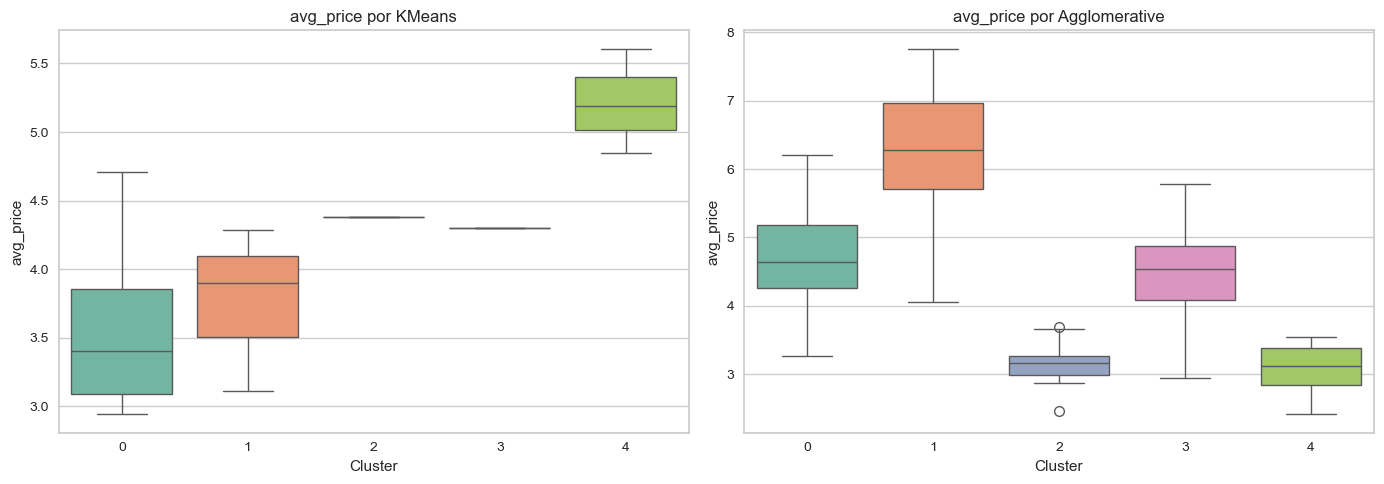

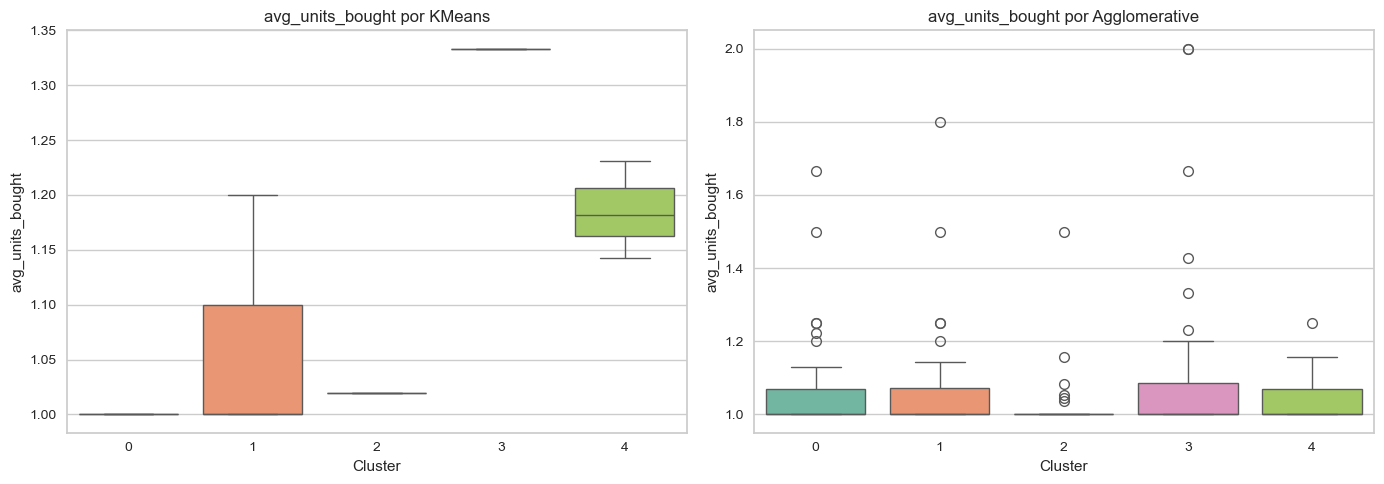

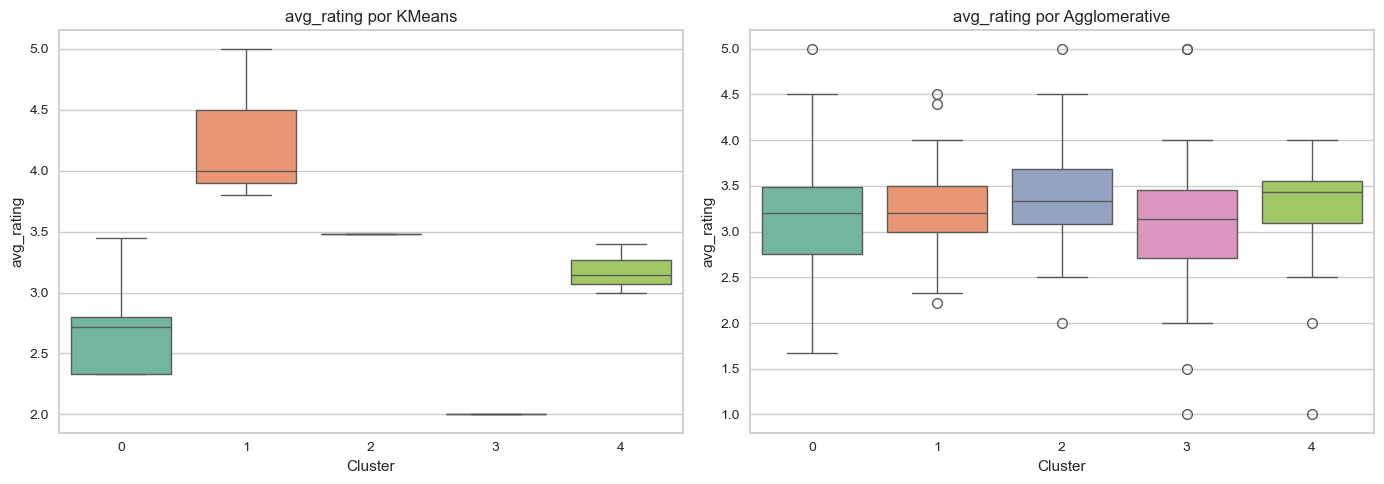

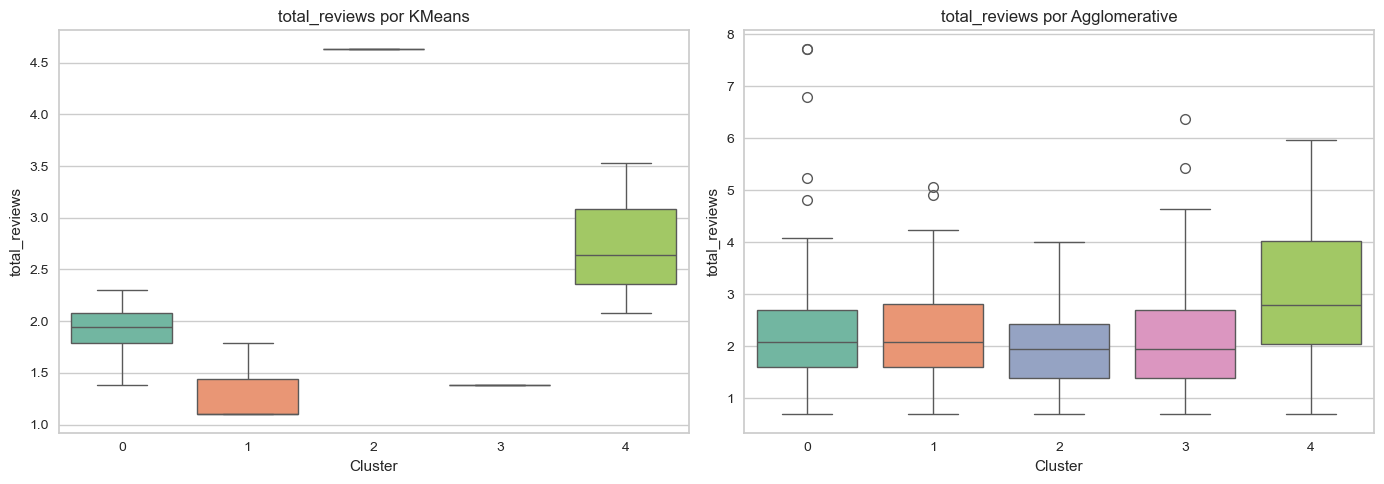

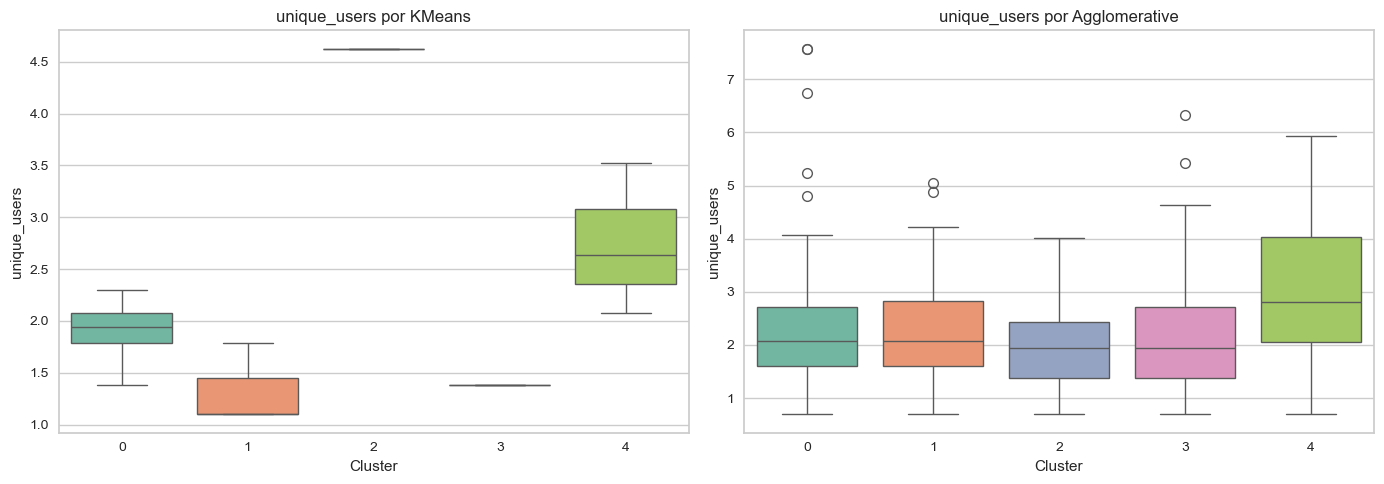

In [ ]:
# Variables numéricas que querés comparar
variables = ["avg_price", "avg_units_bought", "avg_rating", "total_reviews", "unique_users"]

# Clustering methods a evaluar
cluster_methods = ["cluster_kmeans", "cluster_agg"]
titles = ["KMeans", "Agglomerative"]

# DataFrame mapeado
dataframes = {
    "cluster_kmeans": data_model_clean,
    "cluster_agg": data_model
}

# Generar boxplots para cada variable
for var in variables:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    for i, method in enumerate(cluster_methods):
        sns.boxplot(
            data=dataframes[method],
            x=method,
            y=var,
            palette="Set2",
            ax=axes[i]
        )
        axes[i].set_title(f"{var} por {titles[i]}")
        axes[i].set_xlabel("Cluster")
        axes[i].set_ylabel(var)

    plt.tight_layout()
    plt.show()


---

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">NLP</p>

3. Finalmente el departamento le consulta si es posible buscar los 3 elementos más similares al producto con más reviews. Utilice sus conocimientos en NLP y métricas de similitud para dar su respuesta.

In [ ]:
df_reviews

,product_id,user_id,product_name,category,brand,product_price,units_bought,rating,review_text,product_description,date_of_review,sentiment
0,101,user_5690,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,2,5,The quality of the world-building detail is to...,"Meet the Mindful Reads Sci-Fi Epic Pro, design...",2025-04-10,1
1,310,user_3757,PureBloom Bed Sheets Set Pro,Home & Garden,PureBloom,108.76,1,5,This is a fantastic product. Great value for t...,Experience the next level of home & garden wit...,2023-06-15,1
2,101,user_7081,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,2,2,This is not what I was expecting at all. The w...,"Meet the Mindful Reads Sci-Fi Epic Pro, design...",2024-03-22,0
3,105,user_4525,PageTurner Press Cookbook Ultra,Books,PageTurner Press,30.71,1,4,"Five stars, hands down. I would definitely buy...",PageTurner Press proudly presents the Cookbook...,2024-08-20,1
4,310,user_8451,PureBloom Bed Sheets Set Pro,Home & Garden,PureBloom,108.76,1,4,This is a fantastic product. So happy with thi...,Experience the next level of home & garden wit...,2024-09-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,101,user_7594,Mindful Reads Sci-Fi Epic Pro,Books,Mindful Reads,25.24,1,2,Look for other options. The story pacing stopp...,"Meet the Mindful Reads Sci-Fi Epic Pro, design...",2023-03-14,0
9996,108,user_7802,ApexDigital Smartphone Pro,Electronics,ApexDigital,319.03,1,3,It's a decent product for the price. The scree...,Experience the next level of electronics with ...,2024-06-15,1
9997,105,user_4194,PageTurner Press Cookbook Ultra,Books,PageTurner Press,30.71,1,5,Great value for the price. Exceeded my expecta...,PageTurner Press proudly presents the Cookbook...,2023-05-20,1
9998,107,user_2628,KitchenWise LED Desk Lamp Ultra,Home & Garden,KitchenWise,98.41,1,5,The quality of the adjustability is top-notch....,Experience the next level of home & garden wit...,2023-03-27,1


In [ ]:
# Paso 1: Encontrar el producto con más reviews
top_product_id = df_reviews['product_id'].value_counts().idxmax()
top_product_name = df_reviews[df_reviews['product_id'] == top_product_id]['product_name'].iloc[0]
print(f"🔍 Producto con más reviews: {top_product_name} (ID: {top_product_id})")

🔍 Producto con más reviews: PureBloom Bed Sheets Set Pro (ID: 310)


In [ ]:
# Paso 2: Crear dataset de productos únicos con texto combinado
df_unique = df_reviews.drop_duplicates(subset='product_id').copy()
df_unique['combined_text'] = df_unique['product_description'].fillna('') + " " + df_unique['review_text'].fillna('')

In [ ]:
# Paso 3: Vectorizar usando TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_unique['combined_text'])

In [ ]:
# Paso 4: Calcular la similitud de coseno
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
# Paso 5: Identificar índices más similares al top producto
idx_top_product = df_unique[df_unique['product_id'] == top_product_id].index[0]
similar_scores = list(enumerate(cosine_sim[idx_top_product]))
similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
top_similar = [i for i in similar_scores[1:4]]  # Excluye el mismo producto

In [ ]:
# Paso 6: Mostrar resultados
print("\n🔗 Productos más similares al más reseñado:\n")
for idx, score in top_similar:
    producto = df_unique.iloc[idx]
    print(f"📌 Producto: {producto['product_name']}")
    print(f"   🏷️ ID: {producto['product_id']} | 🛍️ Marca: {producto['brand']} | 📦 Categoría: {producto['category']}")
    print(f"   📈 Similitud: {score:.4f}\n")


🔗 Productos más similares al más reseñado:

📌 Producto: KitchenWise Bed Sheets Set Ultra
   🏷️ ID: 192 | 🛍️ Marca: KitchenWise | 📦 Categoría: Home & Garden
   📈 Similitud: 0.6589

📌 Producto: PureBloom Bed Sheets Set X1
   🏷️ ID: 169 | 🛍️ Marca: PureBloom | 📦 Categoría: Home & Garden
   📈 Similitud: 0.6009

📌 Producto: PureBloom Bed Sheets Set 682
   🏷️ ID: 191 | 🛍️ Marca: PureBloom | 📦 Categoría: Home & Garden
   📈 Similitud: 0.5792



4. Muestre mediante gráficos y explicaciones acordes, las conclusiones a las que ha arribado en cada parte del proceso. Documente y comente cada uno de los pasos del análisis y sus decisiones para demostrar su entendimiento sobre el tema.